In [0]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os

%matplotlib inline

In [0]:
# Load packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import seaborn as sns

from sklearn.metrics import confusion_matrix 

In [0]:
#GET FILE TO WORK FROM

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1E_FoSbaboe5azcnUSAChYLyYUrj5xRYO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('combined_trainingdata_20181013.tsv')  

#3. Read file as panda dataframe
import pandas as pd
df = pd.read_csv('combined_trainingdata_20181013.tsv',sep='\t') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
OTRO- No usalo!
if 1==2:
  #2. Get the file
  downloaded = drive.CreateFile({'id':'1Asis-wu3TKow3FevBTe2MA6wKGxAy_aB'}) # replace the id with id of file you want to access
  downloaded.GetContentFile('danicic_modeldata.tsv')  

  #3. Read file as panda dataframe
  import pandas as pd
  df = pd.read_csv('danicic_modeldata.tsv',sep='\t') 

#Cut down data

- NOTES:
    - US_CHICAGO: COMPLAINT_1
    - US_BATON_ROUGE: COMPLAINT_1
    - IRELAND: COMLAINT_2
    - US_CINCINNATI: Not sure, 1 but autofilled, 2 is all NaN
    - US_BLOOMINGTON: 1, bc 2 is all NaN
    - SEECLICKFIX: COMPLAINT_2

- Note: we will have to remove thousands of comments that are autogenerated
- Can try dict of lists for each city, or just make it universal


In [6]:
df.head(2)

,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2
0,0,US_CHICAGO_1725,US_CHICAGO,10/03/2011,health_environment,permits issued by doe work order,environment,environment_general,QUESTIONABLE BUSINESS PRACTICES REGARDING OILS...,[INSPECTION LOG #: 1723 03-OCT-11 18:55:00] TH...
1,1,US_CHICAGO_600301602,US_CHICAGO,07/14/2017,health_environment,illegal dumping work order,environment,environment_dumping,CONSTRUCTION/DEMOLITION DEBRIS DUMPED IN BACK ...,[INSPECTION LOG #: 3439804 14-JUL-17 09:45:00]...


In [7]:
#most entries will use complaint2, but 311 for Chicago, Baton Rouge, and Bloomington use complaint_1
df['model_x']=df['COMPLAINT_2']

for city in ['US_CHICAGO','US_BATON_ROUGE','US_BLOOMINGTON','US_CINCINNATI','City of Chicago','Kermit TX','City of Fort Lauderdale','City of Russell Springs',\
             'City of Chicopee','El Reno OK']:
    df['model_x'][df['CITY'] ==city]=df['COMPLAINT_1'][df['CITY'] ==city]

#df['model_x'][df['CITY'] =='US_CHICAGO']=df['COMPLAINT_1'][df['CITY'] =='US_CHICAGO']
#df['model_x'][df['CITY'] =='US_BATON_ROUGE']=df['COMPLAINT_1'][df['CITY'] =='US_BATON_ROUGE']
#df['model_x'][df['CITY'] =='US_BLOOMINGTON']=df['COMPLAINT_1'][df['CITY'] =='US_BLOOMINGTON']
#df['model_x'][df['CITY'] =='US_CINCINNATI']=df['COMPLAINT_1'][df['CITY'] =='US_CINCINNATI']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
#SeeClickFix that have NaN for complaint_2 in head(3)  
if 2==1:
  for city in ['City of Chicago','Kermit TX','City of Fort Lauderdale','City of Russell Springs',\
               'City of Chicopee','El Reno OK']:
      df['model_x'][df['CITY'] ==city]=df['COMPLAINT_1'][df['CITY'] ==city]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
if 2==1:
  for city in df['CITY'].unique():
      display(df[df['CITY']==city].head(1))

,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
0,0,US_CHICAGO_1725,US_CHICAGO,10/03/2011,health_environment,permits issued by doe work order,environment,environment_general,QUESTIONABLE BUSINESS PRACTICES REGARDING OILS...,[INSPECTION LOG #: 1723 03-OCT-11 18:55:00] TH...,QUESTIONABLE BUSINESS PRACTICES REGARDING OILS...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
48579,48579,US_BATON_ROUGE_220943,US_BATON_ROUGE,03/22/2016 04:40:00 PM,road maintenance issues,pothole,street,street_repair,POTHOLE ON THE SW CORNER OF HILMONT AND SPRING...,NaN,POTHOLE ON THE SW CORNER OF HILMONT AND SPRING...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
281116,281116,ireland_100,IRELAND,01/01/2018,general,road or path defects,street,street_repair,Potholes in Allenwood South,"Hi, I live in Allenwood South (L70044), my hou...","Hi, I live in Allenwood South (L70044), my hou..."


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
304205,304205,US_CINCINNATI_SR18080929,US_CINCINNATI,08/26/2018,police department,"default, police (and junk veh)",environment,environment_abandoned_vehicle,"""Request entered through the Web. Refer to Int...",NaN,"""Request entered through the Web. Refer to Int..."


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
822979,822979,US_BLOOMINGTON_470,US_BLOOMINGTON,2011-06-27T04:00:00-04:00,recycling,general,environment,environment_recycling,Recycables and non-recycables waste mixed. 949,NaN,Recycables and non-recycables waste mixed. 949


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913427,0,SEECLICKFIX_0,City of Chicago,2014-01-09T12:33:52-05:00,NaN,graffiti removal,vandalism,vandalism_graffiti,Graffiti Removal,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913431,4,SEECLICKFIX_10,City of Oakland - OLD,2014-01-09T11:54:22-05:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913447,20,SEECLICKFIX_31,New Haven,2014-01-09T09:37:09-05:00,NaN,public space streets and drains,street,street_drainage,Public Space Streets and Drains,When will State be passable again?,When will State be passable again?


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913500,73,SEECLICKFIX_108,City of Albuquerque - Signs & Markings,2014-01-08T15:00:19-05:00,NaN,traffic signs,street,street_urgent_repair,U-turn sign knocked down,u-turn sign is knocked down,u-turn sign is knocked down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913507,80,SEECLICKFIX_118,SeeClickFix Debris Mapper,2014-01-08T13:28:28-05:00,NaN,other,governance,governance_general,No Heat!!!,Have been without heat since October,Have been without heat since October


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913553,126,SEECLICKFIX_204,OLD City of Richmond,2014-01-07T18:25:57-05:00,NaN,other,governance,governance_general,Alley in need of repair,The 600 block alley between 1st and St. James ...,The 600 block alley between 1st and St. James ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913560,133,SEECLICKFIX_211,Go! Fix,2014-01-07T16:50:58-05:00,NaN,other,governance,governance_general,Delivery Drivers still using Cycleway as a loa...,It is still too common an occurrence that deli...,It is still too common an occurrence that deli...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913588,161,SEECLICKFIX_260,New Haven Parks Department,2014-01-07T09:31:56-05:00,NaN,trimming - priority 2,environment,environment_overgrowth,Trim,large maple tree limbs falling located between...,large maple tree limbs falling located between...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913656,229,SEECLICKFIX_373,Quincy MA,2014-01-06T10:54:36-05:00,NaN,snow plowing,street,street_slippery,Question About Hilly Residential Streets,Is it normal in Quincy for hilly residential s...,Is it normal in Quincy for hilly residential s...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913661,234,SEECLICKFIX_381,Coatesville,2014-01-06T09:53:55-05:00,NaN,fire issues,fire,fire_risks,danger doors blocked,car blocks entrance to apt doors,car blocks entrance to apt doors


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913665,238,SEECLICKFIX_388,City of Miami,2014-01-06T08:20:00-05:00,NaN,road hazard,street,street_general,Road Hazard,Street sign down,Street sign down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913692,265,SEECLICKFIX_431,Brentwood Borough,2014-01-05T15:37:07-05:00,NaN,traffic signal,street,street_urgent_repair,Traffic light not staying green for Brownsvill...,On Brownsville Road I travel past Giant Eagle ...,On Brownsville Road I travel past Giant Eagle ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913706,279,SEECLICKFIX_473,Midtown Alliance,2014-01-04T18:21:57-05:00,NaN,streetlight,street,street_lighting,Streetlight,Need a left turn signal to enter to ABG,Need a left turn signal to enter to ABG


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913747,320,SEECLICKFIX_525,City of Cambridge (Powered by Leland Cheung),2014-01-03T21:04:18-05:00,NaN,other,governance,governance_general,extremely uneven road,A few years ago Nstar tore apart Clinton Stree...,A few years ago Nstar tore apart Clinton Stree...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913776,349,SEECLICKFIX_576,SeeClickFix,2014-01-03T12:24:31-05:00,NaN,other,governance,governance_general,Sunken area in road,Due to the Pike & Rose construction there is a...,Due to the Pike & Rose construction there is a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913824,397,SEECLICKFIX_656,Bibb County,2014-01-02T17:08:30-05:00,NaN,pothole,street,street_repair,POTHOLE,Near Piedmont Orthopaedic Complex on Bowman Blvd,Near Piedmont Orthopaedic Complex on Bowman Blvd


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913846,419,SEECLICKFIX_692,Boston 311,2014-01-02T10:39:05-05:00,NaN,other,governance,governance_general,Snow removal,Elderly woman (about 90 years old) lives alo...,Elderly woman (about 90 years old) lives alo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913902,475,SEECLICKFIX_812,City of Brookhaven,2013-12-31T12:42:49-05:00,NaN,parks,governance,governance_parks_and_rec,Parks Problem,Safety issue. Little kids could run through to...,Safety issue. Little kids could run through to...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913908,481,SEECLICKFIX_821,Test,2013-12-31T10:45:57-05:00,NaN,potholes,street,street_repair,This is a test,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913914,487,SEECLICKFIX_845,Smith County TX,2013-12-31T09:32:45-05:00,NaN,pothole,street,street_repair,Hazardous road,This road is so bad it is going to mess up veh...,This road is so bad it is going to mess up veh...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913915,488,SEECLICKFIX_850,City of Chula Vista,2013-12-31T09:30:35-05:00,NaN,trees,environment,environment_overgrowth,Tree trimming needed K st. - between Broadway ...,Tree trimming needed on K st between Broadway ...,Tree trimming needed on K st between Broadway ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913916,489,SEECLICKFIX_851,SF City Attorney's Office,2013-12-31T09:29:51-05:00,NaN,criminal activity,public_order,publicorder_general,974 Geneva,Dec 22nd SWAT action where prostitutes were ar...,Dec 22nd SWAT action where prostitutes were ar...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
913925,498,SEECLICKFIX_877,DC 311,2013-12-30T21:47:20-05:00,NaN,curb and gutter repair,street,street_drainage,Curb and Gutter Repair,Storm drains along corner of Longfellow St. NW...,Storm drains along corner of Longfellow St. NW...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
914244,817,SEECLICKFIX_1478,City of Tontitown,2013-12-21T11:42:18-05:00,NaN,streets - pothole,street,street_repair,Streets - Pothole,While patrolling had three different citizens ...,While patrolling had three different citizens ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
914303,876,SEECLICKFIX_1577,Newnan GA,2013-12-19T17:12:18-05:00,NaN,other can include anything that is not on list...,governance,governance_general,Parking Issue,Residents constantly park in the alleyway in a...,Residents constantly park in the alleyway in a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
914311,884,SEECLICKFIX_1594,City of St. Paul,2013-12-19T12:38:46-05:00,NaN,pothole,street,street_repair,Pothole of doom,Before the northbound Rober St. stopsign there...,Before the northbound Rober St. stopsign there...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915141,1714,SEECLICKFIX_2494,City of Harrisburg,2013-12-16T14:49:29-05:00,NaN,street maintenance,street,street_general,Deep Pothole,Deep pothole in front of 220 Peffer; almost ap...,Deep pothole in front of 220 Peffer; almost ap...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915161,1734,SEECLICKFIX_2522,Sarasota County (Pilot),2013-12-16T09:38:03-05:00,NaN,street light,street,street_lighting,giant pothole,giant pothole in the intersection of Tarawa an...,giant pothole in the intersection of Tarawa an...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915218,1791,SEECLICKFIX_2609,Go! Fix & Bike North,2013-12-13T17:59:00-05:00,NaN,report: pothole/surface damage,street,street_repair,Report: Pothole/surface damage,From Birdwood Avenue to Eastern Arterial Road ...,From Birdwood Avenue to Eastern Arterial Road ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915248,1821,SEECLICKFIX_2653,City of Somerville,2013-12-12T22:04:19-05:00,NaN,other - city issues,governance,governance_signage,Illegal double utility pole,There is an illegal double utility pole at the...,There is an illegal double utility pole at the...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915274,1847,SEECLICKFIX_2703,Town of Franklin,2013-12-11T20:47:07-05:00,NaN,traffic light,street,street_urgent_repair,state problem,as reportsd before You did follow up on it & g...,as reportsd before You did follow up on it & g...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915294,1867,SEECLICKFIX_2737,City of Lansing,2013-12-11T10:52:31-05:00,NaN,other,governance,governance_general,PARKING ON LAWN,RESIDENT PARKS HIS SUV ON HIS LAWN NEXT TO HIS...,RESIDENT PARKS HIS SUV ON HIS LAWN NEXT TO HIS...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915387,1960,SEECLICKFIX_2892,Roosevelt Island,2013-12-07T21:01:46-05:00,NaN,other,governance,governance_general,NYPD/PSD running stop signs,"Bad enough that we have \regular\"" drivers blo...","Bad enough that we have \regular\"" drivers blo..."


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915499,2072,SEECLICKFIX_3079,Saugus Town Hall,2013-12-04T11:25:56-05:00,NaN,tree issues,environment,environment_overgrowth,Tree destroying side-walk and now dangerous.,To Whom It May Concern: I have a tree dir...,To Whom It May Concern: I have a tree dir...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
915706,2279,SEECLICKFIX_3433,City of Holyoke,2013-11-26T15:46:39-05:00,NaN,other,governance,governance_general,Other,Hello this tree has grown at an angle and is n...,Hello this tree has grown at an angle and is n...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916008,2581,SEECLICKFIX_3990,Burlington VT,2013-11-17T19:37:48-05:00,NaN,graffiti,vandalism,vandalism_graffiti,Moran Plant,The Moran Plant has been a city eye sore for y...,The Moran Plant has been a city eye sore for y...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916023,2596,SEECLICKFIX_4018,Sacramento County,2013-11-17T11:23:55-05:00,NaN,other,governance,governance_general,Other,Code VIo,Code VIo


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916157,2730,SEECLICKFIX_4240,City of Malden,2013-11-13T09:11:16-05:00,NaN,sidewalk or curb repair,street,street_sidewalk,Asphalt Sidewalk Repair - 10 Webber Street,The asphalt sidewalk in front of 10 Webber is ...,The asphalt sidewalk in front of 10 Webber is ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916391,2964,SEECLICKFIX_4676,SF311,2013-11-05T11:43:11-05:00,NaN,sidewalk defect,street,street_sidewalk,Sidewalk Defect,Broken PG&E cement high voltage box at corner ...,Broken PG&E cement high voltage box at corner ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916455,3028,SEECLICKFIX_4796,Long Beach District 5,2013-11-03T14:21:31-05:00,NaN,other,governance,governance_general,No sidewalk,There is no sidewalk at all on the north west ...,There is no sidewalk at all on the north west ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916557,3130,SEECLICKFIX_4974,City of Newton,2013-10-31T11:41:00-04:00,NaN,other,governance,governance_general,Running red light/ Sign change?,Drivers coming from Washington St are continua...,Drivers coming from Washington St are continua...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916594,3167,SEECLICKFIX_5034,City of Kenosha,2013-10-30T15:33:45-04:00,NaN,other,governance,governance_general,Large portion of concrete buckling on street,there is a large chunk of concrete that has bu...,there is a large chunk of concrete that has bu...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916600,3173,SEECLICKFIX_5043,City of Toronto,2013-10-30T14:04:48-04:00,NaN,report minor pothole damage,street,street_repair,Water Flowing From Pipe,(This is not a pothole but no other category u...,(This is not a pothole but no other category u...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916793,3366,SEECLICKFIX_5357,Town of Westborough,2013-10-24T19:01:52-04:00,NaN,other,governance,governance_general,sinkhole in road,small hole in road surface looks open undernea...,small hole in road surface looks open undernea...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
916950,3523,SEECLICKFIX_5673,City of Dunwoody,2013-10-21T11:26:06-04:00,NaN,sidewalk problem,street,street_sidewalk,Sidewalk Problem,Pavers settling,Pavers settling


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
917044,3617,SEECLICKFIX_5860,Kermit TX,2013-10-17T11:28:09-04:00,NaN,nuisance weed/ brush,environment,environment_overgrowth,Nuisance Weed/ Brush,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
917359,3932,SEECLICKFIX_6527,City of Fort Lauderdale,2013-10-09T08:05:19-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
917419,3992,SEECLICKFIX_6656,South Burlington,2013-10-07T13:36:20-04:00,NaN,sidewalks,street,street_sidewalk,Lack of pedestrian facilities at Rice High Sch...,The sidewalk that runs up the hill on Proctor ...,The sidewalk that runs up the hill on Proctor ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
917603,4176,SEECLICKFIX_6963,Olathe,2013-10-02T09:48:04-04:00,NaN,other,governance,governance_general,Other,This week the crosswalk signal has been \stuc...,This week the crosswalk signal has been \stuc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
917635,4208,SEECLICKFIX_7036,Reconnect PA,2013-10-01T09:38:06-04:00,NaN,other,governance,governance_general,Road Patching,Roadway patching and overlays on Slaughterhous...,Roadway patching and overlays on Slaughterhous...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
918861,5434,SEECLICKFIX_8720,Raleigh NC,2013-09-17T17:17:18-04:00,NaN,other,governance,governance_general,Extremely low shoulder,I just witnessed a tractor trailer trying to t...,I just witnessed a tractor trailer trying to t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
920182,6755,SEECLICKFIX_10336,City of Nevada,2013-09-07T00:33:12-04:00,NaN,street light,street,street_lighting,Street Light,Light L529 goes on and off on north east side ...,Light L529 goes on and off on north east side ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
920398,6971,SEECLICKFIX_10597,Town of Ayer,2013-09-05T16:17:51-04:00,NaN,potholes,street,street_repair,Curb Cut problems,At the curb cuts on each side of Phil Berry's ...,At the curb cuts on each side of Phil Berry's ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
921976,8549,SEECLICKFIX_12474,Cudahy CA,2013-08-28T02:42:01-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Increase Police Presence,Salt Lake Market has been vandalized twice thi...,Salt Lake Market has been vandalized twice thi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
922280,8853,SEECLICKFIX_12899,City of Winston-Salem,2013-08-25T07:02:35-04:00,NaN,streets repair,street,street_repair,Streets Repair,Driveway exit with sizable chunks of displaced...,Driveway exit with sizable chunks of displaced...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
922709,9282,SEECLICKFIX_13470,Georgetown County,2013-08-20T14:15:29-04:00,NaN,pothole,street,street_repair,Test - Data Management Committee,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
922917,9490,SEECLICKFIX_13737,City of Stockbridge (City of Stockbridge GA),2013-08-19T12:39:30-04:00,NaN,traffic signals street lights & signs,street,street_urgent_repair,Crime/Safety Issues,There have been numerous vehicle break-ins in ...,There have been numerous vehicle break-ins in ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
922948,9521,SEECLICKFIX_13772,Brookfield MA,2013-08-19T10:44:48-04:00,NaN,other,governance,governance_general,Double pole,This pole was broken in an MVA on March 5 2010,This pole was broken in an MVA on March 5 2010


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
923487,10060,SEECLICKFIX_14479,Torrance,2013-08-13T19:10:04-04:00,NaN,pothole,street,street_repair,Pothole,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
923608,10181,SEECLICKFIX_14647,Raton NM,2013-08-12T19:51:07-04:00,NaN,drainage,street,street_drainage,completely clogged gutter and break in WPA canal,The gutter at Park and S 3rd above the Post Of...,The gutter at Park and S 3rd above the Post Of...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
923675,10248,SEECLICKFIX_14730,Gadsden County,2013-08-12T13:16:44-04:00,NaN,pothole,street,street_repair,home,Big pothole all long street and in front of dr...,Big pothole all long street and in front of dr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
924441,11014,SEECLICKFIX_15729,Voice of San Diego,2013-08-06T22:10:05-04:00,NaN,sidewalk repair,street,street_sidewalk,Sidewalk Repair,Non ADA accessible push to cross ped button,Non ADA accessible push to cross ped button


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
924529,11102,SEECLICKFIX_15852,Town of Kearny,2013-08-06T10:23:35-04:00,NaN,illegal apartment,housing,housing_general,rent illegal apartment,In the number 166 Belgrove Dr. as well as many...,In the number 166 Belgrove Dr. as well as many...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
924660,11233,SEECLICKFIX_16015,Town of Enfield,2013-08-05T14:44:36-04:00,NaN,parks,governance,governance_parks_and_rec,Playground equipment,The plastic tic-tac-toe pieces on the large pl...,The plastic tic-tac-toe pieces on the large pl...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
924795,11368,SEECLICKFIX_16195,Town of Medway,2013-08-04T16:48:37-04:00,NaN,pothole,street,street_repair,Pothole,Sidewalk hazard,Sidewalk hazard


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
924863,11436,SEECLICKFIX_16279,City of Red Deer,2013-08-03T16:43:08-04:00,NaN,other,governance,governance_general,Outside noise of unknown behaviour people,Me and gf were at a movie till 11.45 got home ...,Me and gf were at a movie till 11.45 got home ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
925491,12064,SEECLICKFIX_17059,Redding CT,2013-07-30T16:36:30-04:00,NaN,trees,environment,environment_overgrowth,Trees,Branch needs trimming.,Branch needs trimming.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
925911,12484,SEECLICKFIX_17588,Missouri DOT,2013-07-28T17:09:58-04:00,NaN,pothole,street,street_repair,Pothole,Many large potholes from leonor Sullivan up to...,Many large potholes from leonor Sullivan up to...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
926571,13144,SEECLICKFIX_18420,City of Haverhill,2013-07-24T12:13:27-04:00,NaN,pothole,street,street_repair,Pothole,Many potholes and poor drainage. Looks like ...,Many potholes and poor drainage. Looks like ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
927049,13622,SEECLICKFIX_19039,Fall River MA,2013-07-20T22:15:10-04:00,NaN,sidewalk repair,street,street_sidewalk,Sidewalk Repair,Sidewalk completely overgrown it becomes a haz...,Sidewalk completely overgrown it becomes a haz...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
927227,13800,SEECLICKFIX_19276,City of Albuquerque - PeopleSoft,2013-07-18T22:42:01-04:00,NaN,other,governance,governance_general,Illegal dog sales puppy mill,Someone (Diana Torres 505-440-3450) is posting...,Someone (Diana Torres 505-440-3450) is posting...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
927769,14342,SEECLICKFIX_20028,City of Palo Alto,2013-07-15T01:09:16-04:00,NaN,graffiti,vandalism,vandalism_graffiti,tagginh,Noticed the tagging today on my walk.,Noticed the tagging today on my walk.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
927914,14487,SEECLICKFIX_20233,Town of Stonington,2013-07-11T16:58:25-04:00,NaN,pothole,street,street_repair,Pothole,Pothole,Pothole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
930852,17425,SEECLICKFIX_25679,Village Service Request,2013-04-11T14:18:48-04:00,NaN,other,governance,governance_general,bike lane ends abruptly,There is a section of Pearl Street that has a ...,There is a section of Pearl Street that has a ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
931173,17746,SEECLICKFIX_26575,Montgomery County,2013-04-01T13:08:59-04:00,NaN,street repair,street,street_repair,Worst repaving job in history,I gave up on this issue after writing a letter...,I gave up on this issue after writing a letter...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
931698,18271,SEECLICKFIX_28061,City of Houston,2013-03-09T17:48:41-05:00,NaN,other,governance,governance_general,Pothole,Old skin patch needs fresh asphalt,Old skin patch needs fresh asphalt


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
931749,18322,SEECLICKFIX_28200,City of North Adams,2013-03-07T11:46:21-05:00,NaN,pothole,street,street_repair,Serious pothole,Shakes my house every time someone drives by.,Shakes my house every time someone drives by.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
931811,18384,SEECLICKFIX_28342,Southfield,2013-03-05T07:43:15-05:00,NaN,pothole,street,street_repair,Pot hole lane,There are hundreds of potholes on southbound G...,There are hundreds of potholes on southbound G...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
932509,19082,SEECLICKFIX_30112,City of Lake Elsinore,2013-02-07T17:38:05-05:00,NaN,pothole - not used,street,street_repair,Pothole,Pothole in front of my home,Pothole in front of my home


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
932788,19361,SEECLICKFIX_30719,City of Wilminton,2013-01-30T15:47:08-05:00,NaN,sidewalk repair,street,street_sidewalk,Large broken slat on sidewalk,Just as sidewalk dips down to meet 6th street ...,Just as sidewalk dips down to meet 6th street ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
933391,19964,SEECLICKFIX_32242,Town of Clarksburg,2013-01-04T12:21:56-05:00,NaN,tree issues,environment,environment_overgrowth,Tree issues,This is a test issue. Please ignore.,This is a test issue. Please ignore.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
933751,20324,SEECLICKFIX_33249,SCSU,2012-12-13T17:59:20-05:00,NaN,campus sidewalk issues,street,street_sidewalk,Pedestrian Bridge,The Pedestrian Bridge has multiple large pot h...,The Pedestrian Bridge has multiple large pot h...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
933764,20337,SEECLICKFIX_33307,Moore OK,2012-12-12T22:05:09-05:00,NaN,street maintenance (pot hole hotline 799-4653),street,street_repair,Lane too narrow,someone decided to redesign the lanes here to ...,someone decided to redesign the lanes here to ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
934617,21190,SEECLICKFIX_35742,Stamford,2012-10-30T10:17:05-04:00,NaN,other,governance,governance_general,no power,Old people.. need power,Old people.. need power


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
935533,22106,SEECLICKFIX_38998,Union City,2012-08-28T11:45:40-04:00,NaN,fallen tree branches,environment,environment_overgrowth,Fallen tree branches,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
935712,22285,SEECLICKFIX_39997,City of Lansing (Pilot),2012-08-07T14:01:54-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,This is a pilot test issue. Please ignore. Tha...,This is a pilot test issue. Please ignore. Tha...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
935881,22454,SEECLICKFIX_40764,Maryland,2012-07-21T18:17:11-04:00,NaN,tree down,environment,environment_overgrowth,Tree down,tree down on sidewalk,tree down on sidewalk


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
935885,22458,SEECLICKFIX_40788,City of Snellville,2012-07-20T22:20:40-04:00,NaN,street sign/signal,street,street_urgent_repair,Street Sign/Signal,This is a pilot test issue only.,This is a pilot test issue only.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
936508,23081,SEECLICKFIX_44244,Greenfield MA,2012-05-18T12:53:40-04:00,NaN,other,governance,governance_general,Greening Greenfield link,The link to Greening Greenfield doesn't work. ...,The link to Greening Greenfield doesn't work. ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
936514,23087,SEECLICKFIX_44272,City of Airdrie,2012-05-17T23:33:18-04:00,NaN,other,governance,governance_general,Capital Project 3 - Bert Church Theatre,Bert Church Theatre expansion,Bert Church Theatre expansion


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
936547,23120,SEECLICKFIX_44451,City of Coral Gables,2012-05-15T14:05:39-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,This is a test request. Please ignore.,This is a test request. Please ignore.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
936744,23317,SEECLICKFIX_45458,O'Fallon,2012-04-24T11:55:44-04:00,NaN,nuisance (junk & vehicles weeds),environment,environment_overgrowth,Junk Car,My neighbor have a junk penguin in his yard.,My neighbor have a junk penguin in his yard.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
937250,23823,SEECLICKFIX_48787,City of Palm Springs,2012-02-23T19:20:50-05:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,qwerty,qwerty


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
937895,24468,SEECLICKFIX_57401,North Central Commission Categories,2011-09-21T22:08:41-04:00,NaN,other,governance,governance_general,road needs patched and paved,very rough road. safety concerns.,very rough road. safety concerns.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938025,24598,SEECLICKFIX_61413,Manor SeeClickFix,2011-06-13T12:05:03-04:00,NaN,streetlight,street,street_lighting,Streetlight,street light appears to have broken friday nig...,street light appears to have broken friday nig...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938101,24674,SEECLICKFIX_65044,Town of Brookline,2011-03-22T14:54:35-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,It says a bad word!,It says a bad word!


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938187,24760,SEECLICKFIX_73163,SCF Plus Gov,2010-08-27T11:05:09-04:00,NaN,street light,street,street_lighting,Street Light,Testing for SCF Plus,Testing for SCF Plus


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938197,24770,SEECLICKFIX_74949,Prospect CT,2010-07-14T16:49:01-04:00,NaN,pothole,street,street_repair,Pothole,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938211,24784,SEECLICKFIX_78091,Town of Lexington,2010-05-15T13:07:19-04:00,NaN,trash/recycling,environment,environment_garbage_collection,Trash and Debris on Off Ramp,Is this the town dump - no you could have fool...,Is this the town dump - no you could have fool...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938213,24786,SEECLICKFIX_79098,City of Russell Springs,2010-04-28T17:53:57-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938216,24789,SEECLICKFIX_81888,Wrentham MA,2010-03-16T14:30:10-04:00,NaN,internal only pothole,street,street_repair,Multi Potholes!,Large potholes have been filled but still very...,Large potholes have been filled but still very...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938220,24793,SEECLICKFIX_87002,City of Medford,2009-11-19T06:20:42-05:00,NaN,other,governance,governance_general,Stop Sign,Stop Sign Required at Intersection of Hooker S...,Stop Sign Required at Intersection of Hooker S...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938246,24819,SEECLICKFIX_89344,City of Detroit,2018-10-01T11:45:15-04:00,NaN,rodent extermination - bseed only,public_health,publichealth_pests,Rodent Extermination - BSEED Only,LAST BAITED ON 8-30-18,LAST BAITED ON 8-30-18


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938247,24820,SEECLICKFIX_89346,City of Albuquerque,2018-10-01T11:45:04-04:00,NaN,street light - white bulb,street,street_lighting,Street Light - White Bulb,This area is very dark when High school studen...,This area is very dark when High school studen...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938248,24821,SEECLICKFIX_89347,City of Hammond,2018-10-01T11:44:27-04:00,NaN,other,governance,governance_general,Other,Reported this as tree overgrown on the utility...,Reported this as tree overgrown on the utility...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938249,24822,SEECLICKFIX_89348,City of Jersey City,2018-10-01T11:44:10-04:00,NaN,trash: litter/debris/bulk waste,environment,environment_litter,Trash: Litter/debris/bulk waste,can some please pick up the bags on the sidewalk?,can some please pick up the bags on the sidewalk?


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938251,24824,SEECLICKFIX_89351,City of St. Petersburg,2018-10-01T11:43:32-04:00,NaN,abandoned / inoperative vehicle (on private pr...,environment,environment_abandoned_vehicle,Sitting for many years,Old car sitting in driveway with blue tarp ove...,Old car sitting in driveway with blue tarp ove...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938254,24827,SEECLICKFIX_89356,Neighborhoods,2018-10-01T11:42:18-04:00,NaN,yard and/or structure concern (high grass junk...,environment,environment_overgrowth,Yard and/or Structure Concern (High Grass Junk...,Corner of Barrington Dr. and Central Avenue. S...,Corner of Barrington Dr. and Central Avenue. S...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938255,24828,SEECLICKFIX_89357,Newark Service Department,2018-10-01T11:42:16-04:00,NaN,pothole,street,street_repair,Hard to travel alley,Alley. Is full of ruts and potholes making exi...,Alley. Is full of ruts and potholes making exi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938256,24829,SEECLICKFIX_89358,City of Memphis,2018-10-01T11:41:44-04:00,NaN,curbside trash,environment,environment_dumping,Curbside Trash,Yard waste. Tree branches,Yard waste. Tree branches


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938257,24830,SEECLICKFIX_89359,City of Alameda,2018-10-01T11:41:42-04:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,Tag #39058 Concern install temp S/W raised 4\....,Tag #39058 Concern install temp S/W raised 4\....


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938261,24834,SEECLICKFIX_89363,Code Enforcement Area 5,2018-10-01T11:39:13-04:00,NaN,weeds and grass,environment,environment_overgrowth,Weeds and Grass,Tall weeds and grass,Tall weeds and grass


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938266,24839,SEECLICKFIX_89369,City of Canton OH,2018-10-01T11:37:39-04:00,NaN,health hazard,public_health,publichealth_general,Health Hazard,10012018 - Received complaint for trash and de...,10012018 - Received complaint for trash and de...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938268,24841,SEECLICKFIX_89371,South San Francisco,2018-10-01T11:37:30-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,miller/westview - couch on the sidewalk,miller/westview - couch on the sidewalk


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938270,24843,SEECLICKFIX_89375,City of Berkeley,2018-10-01T11:36:22-04:00,NaN,other,governance,governance_general,Other,Plants are growing into the bike path through ...,Plants are growing into the bike path through ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938271,24844,SEECLICKFIX_89377,Fayetteville - Service Request,2018-10-01T11:36:06-04:00,NaN,other,governance,governance_general,Other,Citizen at 2120 Coffman St noticed a leaning t...,Citizen at 2120 Coffman St noticed a leaning t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938278,24851,SEECLICKFIX_89387,City of Albany,2018-10-01T11:31:40-04:00,NaN,illegal trash,environment,environment_dumping,Illegal Trash,couch and other debris dumped here at closed V...,couch and other debris dumped here at closed V...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938279,24852,SEECLICKFIX_89390,City of Oakland,2018-10-01T11:30:50-04:00,NaN,illegal dumping - debris appliances etc.,environment,environment_dumping,Illegal Dumping - debris appliances etc.,Construction site with an overwhelming amount ...,Construction site with an overwhelming amount ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938281,24854,SEECLICKFIX_89393,City of Vallejo,2018-10-01T11:29:23-04:00,NaN,illegal dumping,environment,environment_dumping,Rv’s garbage & human excrement,The white bus/RV that has been parked here al...,The white bus/RV that has been parked here al...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938282,24855,SEECLICKFIX_89394,Redford Township MI,2018-10-01T11:29:07-04:00,NaN,high grass / vegetation,environment,environment_overgrowth,High Grass / Vegetation,Only once have they cut there grass garbage ju...,Only once have they cut there grass garbage ju...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938284,24857,SEECLICKFIX_89396,Cambridge MA,2018-10-01T11:28:25-04:00,NaN,overflowing public trash/recycling receptacle,environment,environment_garbage_collection,Overflowing Public Trash/Recycling Receptacle,Resident called to report that residents of 21...,Resident called to report that residents of 21...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938287,24860,SEECLICKFIX_89399,City of Huntsville,2018-10-01T11:27:22-04:00,NaN,high grass/weeds,environment,environment_overgrowth,High Grass/Weeds,Grass in the backyard is way overgrown. Has no...,Grass in the backyard is way overgrown. Has no...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938288,24861,SEECLICKFIX_89402,Sarasota County Government,2018-10-01T11:27:06-04:00,NaN,code enforcement,planning,planning_general,Code Enforcement,There is n RV converted into a food truck.It i...,There is n RV converted into a food truck.It i...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938289,24862,SEECLICKFIX_89403,Pinellas County,2018-10-01T11:26:59-04:00,NaN,code enforcement,planning,planning_general,Code Enforcement,GRASS OVER 1 FOOT TALL. HAS NOT BEEN MOWED IN ...,GRASS OVER 1 FOOT TALL. HAS NOT BEEN MOWED IN ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938293,24866,SEECLICKFIX_89408,City of New Britain,2018-10-01T11:25:28-04:00,NaN,pothole,street,street_repair,Pothole,At the intersection of Monroe & Corbin Ave lar...,At the intersection of Monroe & Corbin Ave lar...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938296,24869,SEECLICKFIX_89412,Police Non-Emergency,2018-10-01T11:24:31-04:00,NaN,parked vehicle concern,environment,environment_abandoned_vehicle,Parked Vehicle Concern,Illegal street parking. Homeowners are parking...,Illegal street parking. Homeowners are parking...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938299,24872,SEECLICKFIX_89416,Private Property,2018-10-01T11:23:26-04:00,NaN,overgrown grass/weeds on private property,environment,environment_overgrowth,Overgrown Grass/Weeds on Private Property,Overgrown Weeds on backside of property facing...,Overgrown Weeds on backside of property facing...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938302,24875,SEECLICKFIX_89419,City of Fort Dodge,2018-10-01T11:23:08-04:00,NaN,pothole,street,street_repair,Pothole,large hole in the street,large hole in the street


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938313,24886,SEECLICKFIX_89432,City of Chicopee,2018-10-01T11:21:43-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938321,24894,SEECLICKFIX_89444,Westfield MA,2018-10-01T11:20:21-04:00,NaN,curbside - regular trash/recycling collection,environment,environment_garbage_collection,Curbside - Regular Trash/Recycling Collection,CALLER CLAIMS RECYCLING BIN STILL 3/4 FULL OF ...,CALLER CLAIMS RECYCLING BIN STILL 3/4 FULL OF ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938324,24897,SEECLICKFIX_89450,City of Ferndale MI,2018-10-01T11:19:58-04:00,NaN,street light outage,street,street_lighting,Street Light Outage,The light has been off for a few months.,The light has been off for a few months.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938333,24906,SEECLICKFIX_89464,National City,2018-10-01T11:16:21-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,front axle is damaged not moving for days. Loo...,front axle is damaged not moving for days. Loo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938341,24914,SEECLICKFIX_89476,Howard County MD,2018-10-01T11:14:37-04:00,NaN,roadway & drainage concern,street,street_drainage,Roadway & Drainage Concern,Storm Drain between the houses the pipes could...,Storm Drain between the houses the pipes could...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938343,24916,SEECLICKFIX_89478,Town of Hopkinton,2018-10-01T11:13:38-04:00,NaN,tree issue,environment,environment_overgrowth,Tree Issue,Two very large trees on the side of the road a...,Two very large trees on the side of the road a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938345,24918,SEECLICKFIX_89480,City of Lincoln,2018-10-01T11:13:28-04:00,NaN,pothole,street,street_repair,Pothole,Please grind poor asphalt repair on 27th Stree...,Please grind poor asphalt repair on 27th Stree...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938352,24925,SEECLICKFIX_89488,Roadway,2018-10-01T11:11:38-04:00,NaN,pothole,street,street_repair,Pothole,"Not sure if it's considered a \pothole\"" or if...","Not sure if it's considered a \pothole\"" or if..."


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938362,24935,SEECLICKFIX_89504,City of Taunton,2018-10-01T11:07:07-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938363,24936,SEECLICKFIX_89506,City of Antioch,2018-10-01T11:06:54-04:00,NaN,other,governance,governance_general,Other,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938364,24937,SEECLICKFIX_89507,Macon-Bibb County,2018-10-01T11:06:22-04:00,NaN,s-waste: garbage - cart replacement,environment,environment_garbage_collection,S-WASTE: Garbage - Cart Replacement,Customer needs a trash cart.,Customer needs a trash cart.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938367,24940,SEECLICKFIX_89512,Clayton County,2018-10-01T11:04:33-04:00,NaN,dead tree/limbs,environment,environment_overgrowth,Dead Tree/Limbs,This tree Dead for 6 Months... Many Green Vine...,This tree Dead for 6 Months... Many Green Vine...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938368,24941,SEECLICKFIX_89515,WCRC Yard 2,2018-10-01T11:04:04-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938369,24942,SEECLICKFIX_89517,City of Memphis.,2018-10-01T11:03:50-04:00,NaN,other,governance,governance_general,Dead dog pickup,large white dog has been dead on interstate fo...,large white dog has been dead on interstate fo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938377,24950,SEECLICKFIX_89529,Raleigh City Hall,2018-10-01T11:00:08-04:00,NaN,tree issue in right of way,environment,environment_overgrowth,Tree Issue in Right of Way,Tree is growing on city property and is growin...,Tree is growing on city property and is growin...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938380,24953,SEECLICKFIX_89533,Princeton - Request a Service,2018-10-01T10:59:16-04:00,NaN,clogged storm drain,street,street_drainage,Clogged storm drain,Dorann Ave Princeton NJ 08540,Dorann Ave Princeton NJ 08540


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938382,24955,SEECLICKFIX_89535,City of Attleboro,2018-10-01T10:58:36-04:00,NaN,sewer / roadway drain,street,street_drainage,Sewer / Roadway Drain,IT WAS REPORTED THAT THE DRAIN IN FRONT OF 151...,IT WAS REPORTED THAT THE DRAIN IN FRONT OF 151...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938383,24956,SEECLICKFIX_89536,City of Shawnee,2018-10-01T10:58:12-04:00,NaN,other,governance,governance_general,Other,Shoes hanging from power lines on the north si...,Shoes hanging from power lines on the north si...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938386,24959,SEECLICKFIX_89541,Animal Control - Jersey City,2018-10-01T10:56:26-04:00,NaN,dead animal,environment,environment_dead_animal,Dead Animal,injured squirrel on sidewalk looks like it's d...,injured squirrel on sidewalk looks like it's d...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938388,24961,SEECLICKFIX_89543,City of Topeka,2018-10-01T10:56:00-04:00,NaN,other,governance,governance_general,Parking violation,Multiple vehicles parked on front yard and sid...,Multiple vehicles parked on front yard and sid...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938397,24970,SEECLICKFIX_89558,Arlington Heights,2018-10-01T10:50:50-04:00,NaN,tree trim,environment,environment_overgrowth,Tree Trim,Good morning please let us know if you can tri...,Good morning please let us know if you can tri...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938404,24977,SEECLICKFIX_89568,Village of Oswego,2018-10-01T10:48:45-04:00,NaN,sidewalk/path,street,street_sidewalk,Sidewalk/Path,The side walk in my front yard appears to be s...,The side walk in my front yard appears to be s...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938420,24993,SEECLICKFIX_89591,Garden City,2018-10-01T10:41:24-04:00,NaN,tree maintenance,environment,environment_overgrowth,Tree Maintenance,village tree needs trimming very dangerous bra...,village tree needs trimming very dangerous bra...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938423,24996,SEECLICKFIX_89594,Austin 311,2018-10-01T10:40:47-04:00,NaN,other,governance,governance_general,Other,Clogged toilet between room 105,Clogged toilet between room 105


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938425,24998,SEECLICKFIX_89597,Other,2018-10-01T10:40:29-04:00,NaN,tree trimming,environment,environment_overgrowth,Tree Trimming,The branches are hanging over and onto the str...,The branches are hanging over and onto the str...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938430,25003,SEECLICKFIX_89605,Gloucester MA,2018-10-01T10:38:01-04:00,NaN,private property issue,housing,housing_general,Private Property Issue,This house at 11 Forest St has been foreclosed...,This house at 11 Forest St has been foreclosed...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938439,25012,SEECLICKFIX_89616,Yerba Buena Community Benefit District,2018-10-01T10:33:33-04:00,NaN,cleaning,street,street_cleaning,Cleaning,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938448,25021,SEECLICKFIX_89630,City of Edinburg,2018-10-01T10:29:26-04:00,NaN,sewer backups,infrastructure,infrastructure_water,Sewer Backups,9/30/18 @ 1212 - Sewer backup. Reported to Al...,9/30/18 @ 1212 - Sewer backup. Reported to Al...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938454,25027,SEECLICKFIX_89637,Town of Braintree,2018-10-01T10:27:57-04:00,NaN,tree concern,environment,environment_overgrowth,Tree Concern,Tree has large hole in it totally hollow and ...,Tree has large hole in it totally hollow and ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938458,25031,SEECLICKFIX_89645,City of Summit,2018-10-01T10:26:15-04:00,NaN,parks and public spaces,governance,governance_parks_and_rec,Parks and Public Spaces,Please complete job--chain link fencing betwee...,Please complete job--chain link fencing betwee...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938474,25047,SEECLICKFIX_89668,Code Enforcement,2018-10-01T10:19:58-04:00,NaN,overgrown grass/weeds/vegetation/trees,environment,environment_overgrowth,Overgrown Grass/Weeds/Vegetation/Trees,Residential,Residential


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938487,25060,SEECLICKFIX_89685,Agoura Hills,2018-10-01T10:15:22-04:00,NaN,graffiti - public property,vandalism,vandalism_graffiti,Graffiti - Public Property,On Saturday September 29 2018 witnessed graffi...,On Saturday September 29 2018 witnessed graffi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938488,25061,SEECLICKFIX_89686,Town of Wake Forest,2018-10-01T10:15:07-04:00,NaN,tree issue,environment,environment_overgrowth,Tree damaged from car crash,I filed a police report last evening around 6:...,I filed a police report last evening around 6:...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938490,25063,SEECLICKFIX_89690,Public Property,2018-10-01T10:12:21-04:00,NaN,other public property issues,environment,environment_general,abandoned shopping cart,abandoned shopping cart,abandoned shopping cart


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938495,25068,SEECLICKFIX_89696,East Point GA,2018-10-01T10:10:21-04:00,NaN,code enforcement issue,planning,planning_general,Code Enforcement Issue,This has been a 'problem' property for more th...,This has been a 'problem' property for more th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938496,25069,SEECLICKFIX_89698,Zoning,2018-10-01T10:10:07-04:00,NaN,unregistered or inoperable vehicle,environment,environment_abandoned_vehicle,Unregistered or Inoperable Vehicle,Located on side of Magothy Beach Rd and Pine D...,Located on side of Magothy Beach Rd and Pine D...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938505,25078,SEECLICKFIX_89709,City of Bexley,2018-10-01T10:05:27-04:00,NaN,street / sidewalk,street,street_sidewalk,Street / Sidewalk,The bridge next to Tim Horton on Livingston Av...,The bridge next to Tim Horton on Livingston Av...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938508,25081,SEECLICKFIX_89715,Wilton CT,2018-10-01T10:04:06-04:00,NaN,mowing trimming overgrown vegetation (roads),environment,environment_overgrowth,Mowing Trimming Overgrown Vegetation (Roads),Mowing needed on Pipers Hill. Overgrowth in ro...,Mowing needed on Pipers Hill. Overgrowth in ro...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938518,25091,SEECLICKFIX_89733,Minneapolis 311,2018-10-01T10:01:03-04:00,NaN,traffic signal trouble,street,street_urgent_repair,Traffic Signal Trouble,All traffic lights out,All traffic lights out


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938520,25093,SEECLICKFIX_89736,City of Ann Arbor,2018-10-01T10:00:36-04:00,NaN,streetlight repair,street,street_lighting,Streetlight repair,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938533,25106,SEECLICKFIX_89754,Inspection and Permits,2018-10-01T09:56:40-04:00,NaN,building violation,planning,planning_unsafe_environment,Building Violation,The house was SUPPOSED to have a mother in law...,The house was SUPPOSED to have a mother in law...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938534,25107,SEECLICKFIX_89755,Missouri City,2018-10-01T09:55:58-04:00,NaN,vegetation,environment,environment_overgrowth,Vegetation,Neighbors have reported the back yard of this ...,Neighbors have reported the back yard of this ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938536,25109,SEECLICKFIX_89762,City of Beaumont,2018-10-01T09:54:16-04:00,NaN,code enforcement - litter/weeds/junk car/etc,environment,environment_overgrowth,Code Enforcement - Litter/Weeds/Junk Car/Etc,tree limbs over hanging into the roadway and c...,tree limbs over hanging into the roadway and c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938540,25113,SEECLICKFIX_89768,City of Salem,2018-10-01T09:52:06-04:00,NaN,other - city issues,governance,governance_signage,Other - City Issues,Illegally parked boat trailer.,Illegally parked boat trailer.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938542,25115,SEECLICKFIX_89772,The Burlington Electric,2018-10-01T09:51:19-04:00,NaN,street light out,street,street_lighting,Street Light Out,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938557,25130,SEECLICKFIX_89800,Inkster MI,2018-10-01T09:43:55-04:00,NaN,other,governance,governance_general,Other,On the corner of Carlysle St. and Inkster Rd. ...,On the corner of Carlysle St. and Inkster Rd. ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938570,25143,SEECLICKFIX_89817,Utah DOT,2018-10-01T09:37:43-04:00,NaN,animal carcass,environment,environment_dead_animal,Animal Carcass,Deer in shoulder,Deer in shoulder


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938572,25145,SEECLICKFIX_89823,Town of Needham,2018-10-01T09:35:21-04:00,NaN,tree issues,environment,environment_overgrowth,Tree Issues,Bushes covering sidewalk,Bushes covering sidewalk


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938573,25146,SEECLICKFIX_89824,City of St. Albert,2018-10-01T09:35:16-04:00,NaN,street lights utility boxes,street,street_lighting,Traffic Lights,The lights are not working... the north lights...,The lights are not working... the north lights...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938583,25156,SEECLICKFIX_89841,City of Pembroke Pines,2018-10-01T09:29:27-04:00,NaN,issues within a private property,public_order,publicorder_general,Issues within a Private Property,Pool is green inside open for mosquitoes and m...,Pool is green inside open for mosquitoes and m...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938592,25165,SEECLICKFIX_89855,City of Portsmouth,2018-10-01T09:26:05-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,Caller reports that a cat gym (scratching post...,Caller reports that a cat gym (scratching post...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938611,25184,SEECLICKFIX_89882,Engineering,2018-10-01T09:15:36-04:00,NaN,sidewalk obstructions,street,street_sidewalk,Sidewalk Damage,Sidewalk impassable because of plantings,Sidewalk impassable because of plantings


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938614,25187,SEECLICKFIX_89886,Natick MA,2018-10-01T09:14:36-04:00,NaN,water or sanitary sewer inquiry,infrastructure,infrastructure_water,Water or Sanitary Sewer Inquiry,Please call me and let me know when the water ...,Please call me and let me know when the water ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938624,25197,SEECLICKFIX_89907,Corona,2018-10-01T09:08:27-04:00,NaN,street light issues (not traffic signals),street,street_lighting,Light out,Light pole on corner of olive and garretson is...,Light pole on corner of olive and garretson is...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938625,25198,SEECLICKFIX_89908,Village of Flossmoor,2018-10-01T09:08:19-04:00,NaN,sewer,infrastructure,infrastructure_water,Sewer,Hydrant meter request,Hydrant meter request


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938633,25206,SEECLICKFIX_89924,Trash/Recycling,2018-10-01T09:01:24-04:00,NaN,request a new recycling container,environment,environment_recycling,Request a new Recycling Container,New Development Pondview 8341 Kippis Rd Need...,New Development Pondview 8341 Kippis Rd Need...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938635,25208,SEECLICKFIX_89927,Framingham MA,2018-10-01T09:00:25-04:00,NaN,other (non-police related issues),governance,governance_general,Other (Non-Police Related Issues),There is a strong smell of gas on the street.,There is a strong smell of gas on the street.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938649,25222,SEECLICKFIX_89962,Jekyll Island GA (Authority Use Only),2018-10-01T08:48:38-04:00,NaN,other,governance,governance_general,broken mini fridge,our employee mini fridge started leaking oil,our employee mini fridge started leaking oil


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938650,25223,SEECLICKFIX_89964,Code Enforcement Area 6,2018-10-01T08:47:43-04:00,NaN,other,governance,governance_general,Other,The Rise at Northgate has not been able to pro...,The Rise at Northgate has not been able to pro...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938661,25234,SEECLICKFIX_89979,City of Portage,2018-10-01T08:38:35-04:00,NaN,other,governance,governance_general,Rusty colored water,Nasty brown/rusty color water in some residenc...,Nasty brown/rusty color water in some residenc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938662,25235,SEECLICKFIX_89980,Traffic Signals - Chapel Hill & Carrboro,2018-10-01T08:37:29-04:00,NaN,traffic signal,street,street_urgent_repair,Traffic Signal,When turning left from Seawell School onto Hom...,When turning left from Seawell School onto Hom...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938665,25238,SEECLICKFIX_89984,City of Sandy Springs,2018-10-01T08:36:48-04:00,NaN,code enforcement problem,planning,planning_general,Code Enforcement Problem,It appears that interior renovations are being...,It appears that interior renovations are being...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938671,25244,SEECLICKFIX_89992,Detroit Water & Sewerage Dept.,2018-10-01T08:32:50-04:00,NaN,blocked catch basin,street,street_drainage,Blocked Catch Basin,Water over half the street,Water over half the street


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938695,25268,SEECLICKFIX_90032,Folly Beach SC,2018-10-01T08:15:40-04:00,NaN,beach walkovers accesses & paths,governance,governance_parks_and_rec,Beach Walkovers Accesses & Paths,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938705,25278,SEECLICKFIX_90051,City of Pinellas Park,2018-10-01T08:01:58-04:00,NaN,overgrown property/brush piles,environment,environment_overgrowth,Overgrown lawn,House appears abandoned and the lawn is out co...,House appears abandoned and the lawn is out co...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938711,25284,SEECLICKFIX_90060,City of Alpharetta,2018-10-01T07:53:32-04:00,NaN,traffic issue,street,street_general,Traffic Issue,Two elementary school age children obstructing...,Two elementary school age children obstructing...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938712,25285,SEECLICKFIX_90061,City of Portland,2018-10-01T07:51:10-04:00,NaN,streets,street,street_general,Street Lights,Hi It appears that the Franlin Street lights ...,Hi It appears that the Franlin Street lights ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938723,25296,SEECLICKFIX_90078,Roswell Georgia,2018-10-01T07:30:10-04:00,NaN,streets (overhead street lighting concern),street,street_lighting,Streets (Overhead Street Lighting Concern),Our light is no longer functioning. I presume ...,Our light is no longer functioning. I presume ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938730,25303,SEECLICKFIX_90087,City of Carbondale,2018-10-01T07:18:55-04:00,NaN,private property - weeds/grass,environment,environment_overgrowth,Private Property - Weeds/Grass,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938731,25304,SEECLICKFIX_90088,City of Manchester,2018-10-01T07:18:35-04:00,NaN,other,governance,governance_general,Other,Right travel lane North bound. Gravel has mig...,Right travel lane North bound. Gravel has mig...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938735,25308,SEECLICKFIX_90096,Town of Whitman,2018-10-01T07:12:02-04:00,NaN,other,governance,governance_general,OTHER-SOUNDS OF STENTS UNLODGING EVERYWHERE,STENTS are popping out of the cricknation hear...,STENTS are popping out of the cricknation hear...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938760,25333,SEECLICKFIX_90145,City of Manchester - Parking,2018-10-01T05:59:37-04:00,NaN,parking enforcement,public_order,publicorder_general,Parking Enforcement,Car has been parked here for 3 days and has no...,Car has been parked here for 3 days and has no...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938763,25336,SEECLICKFIX_90151,Gilbert AZ,2018-10-01T05:36:15-04:00,NaN,street light outage/malfunction,street,street_lighting,Street Light Outage/Malfunction,Intermittent streetlight,Intermittent streetlight


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938767,25340,SEECLICKFIX_90158,Sterling Heights MI,2018-10-01T04:39:26-04:00,NaN,general inquiry,governance,governance_general,Why is there no response to this?,Acknowledged 9/12 and then nothing. I'd like a...,Acknowledged 9/12 and then nothing. I'd like a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938768,25341,SEECLICKFIX_90162,City of Bridgeport,2018-10-01T03:47:39-04:00,NaN,other,governance,governance_general,Dumping,I came back from vacation and found a couch on...,I came back from vacation and found a couch on...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938779,25352,SEECLICKFIX_90177,Ferguson MO,2018-10-01T01:38:14-04:00,NaN,high weeds / tall grass,environment,environment_overgrowth,High Weeds / Tall Grass,Abandoned house wirh foot tall grass,Abandoned house wirh foot tall grass


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938783,25356,SEECLICKFIX_90184,Menlo Park,2018-10-01T01:22:11-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,Old bike and other items illegally dumped on t...,Old bike and other items illegally dumped on t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938805,25378,SEECLICKFIX_90211,City of Folsom,2018-10-01T00:18:11-04:00,NaN,street light out/damaged,street,street_lighting,Street Light Out/Damaged,Street sign slipped down,Street sign slipped down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938810,25383,SEECLICKFIX_90216,City of Dixon,2018-10-01T00:12:15-04:00,NaN,street light,street,street_lighting,Street Light,These come on for a few minutes like they are ...,These come on for a few minutes like they are ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938830,25403,SEECLICKFIX_90245,Leland NC,2018-09-30T23:36:24-04:00,NaN,other,governance,governance_general,Other,water from tap is discolored comes out yellowish,water from tap is discolored comes out yellowish


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938832,25405,SEECLICKFIX_90250,City of Ypsilanti,2018-09-30T23:28:17-04:00,NaN,abandoned vehicles in street,environment,environment_abandoned_vehicle,Abandoned Vehicles in Street,Left on the street for over 5 days. Has multip...,Left on the street for over 5 days. Has multip...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938835,25408,SEECLICKFIX_90254,City of Valdosta,2018-09-30T23:21:29-04:00,NaN,street light outages,street,street_lighting,Street Light Outages,The street light is out in front of my house a...,The street light is out in front of my house a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938836,25409,SEECLICKFIX_90255,Sanitation / Litter,2018-09-30T23:21:07-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,Apparently either residents or landscapers are...,Apparently either residents or landscapers are...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938850,25423,SEECLICKFIX_90273,City of New Bedford,2018-09-30T22:56:21-04:00,NaN,potholes,street,street_repair,Potholes,There are multiple pot holes and uneven ground...,There are multiple pot holes and uneven ground...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938853,25426,SEECLICKFIX_90278,City of Champaign,2018-09-30T22:49:52-04:00,NaN,repair to a streetlight needed,street,street_lighting,Repair to a streetlight needed,The streetlight at the SW corner of 4th and Wa...,The streetlight at the SW corner of 4th and Wa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938883,25456,SEECLICKFIX_90328,City of Bainbridge Island,2018-09-30T21:42:15-04:00,NaN,other,governance,governance_general,construction material not secured,mega projext on madrona way ne has cinstructio...,mega projext on madrona way ne has cinstructio...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938889,25462,SEECLICKFIX_90336,American Canyon CA,2018-09-30T21:35:15-04:00,NaN,litter,environment,environment_litter,Litter,garbage can under powerlines full for two week...,garbage can under powerlines full for two week...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938941,25514,SEECLICKFIX_90411,Trees,2018-09-30T20:47:27-04:00,NaN,tree or stump maintainence request,environment,environment_overgrowth,Tree or Stump Maintainence Request,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938947,25520,SEECLICKFIX_90419,Encinitas CA,2018-09-30T20:43:34-04:00,NaN,flooding,street,street_drainage,Flooding,Irrigation lines along Leucadia blvd are broke...,Irrigation lines along Leucadia blvd are broke...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938958,25531,SEECLICKFIX_90436,City of Brockton MA,2018-09-30T20:33:12-04:00,NaN,pothole,street,street_repair,Pothole,hi so many on this street whole street needs t...,hi so many on this street whole street needs t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938995,25568,SEECLICKFIX_90481,City of Tucson,2018-09-30T20:11:01-04:00,NaN,pothole,street,street_repair,Pothole,intersection of E Paseo Grande and Longfellow,intersection of E Paseo Grande and Longfellow


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
938996,25569,SEECLICKFIX_90482,City of Vista,2018-09-30T20:10:28-04:00,NaN,traffic sign problem,street,street_urgent_repair,Traffic Sign Problem,stop sign at corner of promontory and Landing ...,stop sign at corner of promontory and Landing ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939049,25622,SEECLICKFIX_90545,Newport RI,2018-09-30T19:30:25-04:00,NaN,tree or vegetation issue,environment,environment_overgrowth,Roadway or Sidewalk Issue,House has vegetation that takes over the sidew...,House has vegetation that takes over the sidew...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939056,25629,SEECLICKFIX_90554,Mankato 311,2018-09-30T19:24:03-04:00,NaN,streetlight,street,street_lighting,Streetlight,Since the construction on Adams began this int...,Since the construction on Adams began this int...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939072,25645,SEECLICKFIX_90580,City of New Westminster,2018-09-30T19:07:10-04:00,NaN,street light out,street,street_lighting,Street Light Out,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939103,25676,SEECLICKFIX_90615,Harford County MD,2018-09-30T18:51:59-04:00,NaN,sidewalk issue,street,street_sidewalk,Sidewalk Issue,Trees planted by county in front of my home ar...,Trees planted by county in front of my home ar...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939104,25677,SEECLICKFIX_90616,Blackfalds Alberta,2018-09-30T18:51:40-04:00,NaN,roads & sidewalks,street,street_sidewalk,Roads & Sidewalks,Our back alley is in desperate need of a grade...,Our back alley is in desperate need of a grade...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939120,25693,SEECLICKFIX_90635,Sammamish WA,2018-09-30T18:41:15-04:00,NaN,tree/vegetation issue in public right-of-way,environment,environment_overgrowth,Tree/Vegetation Issue in Public Right-of-Way,Along the narrow paved path connecting SE 14th...,Along the narrow paved path connecting SE 14th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939124,25697,SEECLICKFIX_90641,Planning & Zoning,2018-09-30T18:37:17-04:00,NaN,blight - illegal dumping,environment,environment_dumping,Blight - Illegal Dumping,Furniture and mattresses dumped on Treadwell b...,Furniture and mattresses dumped on Treadwell b...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939207,25780,SEECLICKFIX_90756,City of Eden Prairie,2018-09-30T17:28:07-04:00,NaN,tree,environment,environment_overgrowth,Tree,On the path in Edenbrook Conservation Area rig...,On the path in Edenbrook Conservation Area rig...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939208,25781,SEECLICKFIX_90757,Landings Association,2018-09-30T17:27:57-04:00,NaN,tree maintenance request on common property,environment,environment_overgrowth,Tree Maintenance Request on Common Property,Please trim the live oak tree up so branches o...,Please trim the live oak tree up so branches o...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939233,25806,SEECLICKFIX_90785,Clovis NM,2018-09-30T17:11:25-04:00,NaN,weeds (cc),environment,environment_overgrowth,Weeds (CC),Yard and alley is tall and full of weeds,Yard and alley is tall and full of weeds


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939237,25810,SEECLICKFIX_90789,Edina MN,2018-09-30T17:07:11-04:00,NaN,other,governance,governance_general,Other,This trash area faces Cahill and the residents...,This trash area faces Cahill and the residents...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939280,25853,SEECLICKFIX_90850,Venice FL,2018-09-30T16:37:23-04:00,NaN,city property or city parks,governance,governance_parks_and_rec,City Property or City Parks,trees overgrown blocking road,trees overgrown blocking road


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939293,25866,SEECLICKFIX_90863,City of Richmond,2018-09-30T16:30:26-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal dumping,There are a bunch of old tires stashed in the ...,There are a bunch of old tires stashed in the ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939304,25877,SEECLICKFIX_90875,Chelsea MA,2018-09-30T16:23:32-04:00,NaN,sidewalk conditions (other than snow & ice rem...,street,street_slippery,Sidewalk Conditions (other than Snow & Ice Rem...,Someone put plywood over all the tree spots on...,Someone put plywood over all the tree spots on...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939308,25881,SEECLICKFIX_90879,City of Westland,2018-09-30T16:20:53-04:00,NaN,forestry - tree removal,environment,environment_overgrowth,Forestry - Tree Removal,Sycamore on front easement/boulevard is leanin...,Sycamore on front easement/boulevard is leanin...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939325,25898,SEECLICKFIX_90901,Village of Algonquin,2018-09-30T16:08:03-04:00,NaN,tree dead/damaged/broken,environment,environment_overgrowth,Tree Dead/Damaged/Broken,tree limbs from storm put out by the curb,tree limbs from storm put out by the curb


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939349,25922,SEECLICKFIX_90933,Surfside FL,2018-09-30T15:51:32-04:00,NaN,other,governance,governance_general,Other,Lane directive sign is peeling making it risky...,Lane directive sign is peeling making it risky...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939391,25964,SEECLICKFIX_90981,City of Emeryville,2018-09-30T15:23:28-04:00,NaN,tree issue,environment,environment_overgrowth,Tree Issue,There are 3 dead trees in the alley they have ...,There are 3 dead trees in the alley they have ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939408,25981,SEECLICKFIX_91001,Town of Randolph,2018-09-30T15:11:16-04:00,NaN,housing - trash/overgrown lawn,environment,environment_overgrowth,Housing - Trash/Overgrown Lawn,Whole yard overgrown,Whole yard overgrown


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939446,26019,SEECLICKFIX_91051,Broken Arrow OK,2018-09-30T14:44:07-04:00,NaN,trees,environment,environment_overgrowth,Trees,At the entrance of Union Station on N Willow a...,At the entrance of Union Station on N Willow a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939464,26037,SEECLICKFIX_91072,Parks,2018-09-30T14:35:44-04:00,NaN,tree pruning,environment,environment_overgrowth,Tree Pruning,the tree in question is off the entrance of a ...,the tree in question is off the entrance of a ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939484,26057,SEECLICKFIX_91094,Public Works,2018-09-30T14:26:41-04:00,NaN,road & pothole repair,street,street_repair,Road & Pothole Repair,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939499,26072,SEECLICKFIX_91112,City of Tukwila,2018-09-30T14:22:16-04:00,NaN,overgrown brush/trees,environment,environment_overgrowth,Overgrown Brush/Trees,Overgrown tree resting on my fence. I've conta...,Overgrown tree resting on my fence. I've conta...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939564,26137,SEECLICKFIX_91191,Town of Swampscott,2018-09-30T13:34:30-04:00,NaN,other,governance,governance_general,Other,Utility line down,Utility line down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939627,26200,SEECLICKFIX_91272,Edgewood KY,2018-09-30T12:58:04-04:00,NaN,other,governance,governance_general,Theft,Sometime over the past week or so someone stol...,Sometime over the past week or so someone stol...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939639,26212,SEECLICKFIX_91286,Town of Chelmsford,2018-09-30T12:52:19-04:00,NaN,pothole,street,street_repair,Pothole,There are numerous potholes at the end of Wave...,There are numerous potholes at the end of Wave...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939661,26234,SEECLICKFIX_91310,Streets Alleys Sidewalks and Traffic,2018-09-30T12:39:37-04:00,NaN,street pothole concern,street,street_repair,Street Pothole Concern,3 potholes needing patched,3 potholes needing patched


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939676,26249,SEECLICKFIX_91326,Alachua County FL - Rural Service Area,2018-09-30T12:30:25-04:00,NaN,dead animal pickup,environment,environment_dead_animal,Dead deer on side of road,Not sure if address is correct (app did not al...,Not sure if address is correct (app did not al...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939752,26325,SEECLICKFIX_91430,City of Decatur,2018-09-30T11:23:39-04:00,NaN,city trees and park maintenance,governance,governance_parks_and_rec,City Trees and Park Maintenance,Very tall flowers at intersection of College A...,Very tall flowers at intersection of College A...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939843,26416,SEECLICKFIX_91548,North Port FL,2018-09-30T10:17:25-04:00,NaN,tall grass - weeds,environment,environment_overgrowth,Tall Grass - Weeds,Tall grass and weeds,Tall grass and weeds


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939900,26473,SEECLICKFIX_91619,Reading MA,2018-09-30T09:21:20-04:00,NaN,other,governance,governance_general,Rat,Dead rat,Dead rat


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939943,26516,SEECLICKFIX_91671,City of Cooper City,2018-09-30T08:36:35-04:00,NaN,tree issues,environment,environment_overgrowth,Tree Issues,Black olive tree has a whitefly infestation. D...,Black olive tree has a whitefly infestation. D...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939947,26520,SEECLICKFIX_91678,Trash,2018-09-30T08:31:28-04:00,NaN,recycling collection,environment,environment_recycling,Removal of can,My husband and I have called in our blue recyc...,My husband and I have called in our blue recyc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939949,26522,SEECLICKFIX_91680,City Service Area,2018-09-30T08:30:21-04:00,NaN,tree/limbs,environment,environment_overgrowth,Tree/Limbs,Stump growth blocking mailbox accessibility,Stump growth blocking mailbox accessibility


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939954,26527,SEECLICKFIX_91687,City of Saline,2018-09-30T08:22:19-04:00,NaN,code enforcement,planning,planning_general,Code Enforcement,Mud/dirt on the road. Inadequate soil erosion ...,Mud/dirt on the road. Inadequate soil erosion ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939968,26541,SEECLICKFIX_91706,City of Marlborough,2018-09-30T07:43:07-04:00,NaN,other,governance,governance_general,Other,Malfunctioning Car Alarm--Horn starts honking ...,Malfunctioning Car Alarm--Horn starts honking ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939982,26555,SEECLICKFIX_91725,Eufaula AL,2018-09-30T06:46:00-04:00,NaN,other,governance,governance_general,Water Pressure,There are no leaks at 288 Gammage road. Inside...,There are no leaks at 288 Gammage road. Inside...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
939991,26564,SEECLICKFIX_91737,Town of Amherst MA,2018-09-30T05:00:39-04:00,NaN,traffic or street sign issue,street,street_urgent_repair,Traffic or Street Sign Issue,Greetings and felicitations. As of tonight th...,Greetings and felicitations. As of tonight th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940032,26605,SEECLICKFIX_91787,City of Manassas VA,2018-09-30T00:04:58-04:00,NaN,tree limb on or near power line,environment,environment_overgrowth,Tree Limb on or near power line,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940054,26627,SEECLICKFIX_91814,WCRC Yard 5,2018-09-29T23:33:06-04:00,NaN,pothole,street,street_repair,Pothole,Several potholes over a span of 300 ft,Several potholes over a span of 300 ft


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940214,26787,SEECLICKFIX_92004,Residential,2018-09-29T20:33:02-04:00,NaN,trash- extra black container,environment,environment_garbage_collection,Other,I need 2 extra recycling containers. The Gilbe...,I need 2 extra recycling containers. The Gilbe...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940274,26847,SEECLICKFIX_92071,Fitchburg MA,2018-09-29T19:55:47-04:00,NaN,pothole,street,street_repair,Pothole,Between flashing yellow light and United Way o...,Between flashing yellow light and United Way o...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940281,26854,SEECLICKFIX_92078,Public Property and Parks,2018-09-29T19:52:31-04:00,NaN,other,governance,governance_general,furniture deposited,abandoned furniture by roadside,abandoned furniture by roadside


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940308,26881,SEECLICKFIX_92108,City of Hartsville,2018-09-29T19:26:35-04:00,NaN,stormwater drainage problem (catch basin ditch),street,street_drainage,Stormwater drainage problem (catch basin ditch),The storm drains on Kenwood are not draining a...,The storm drains on Kenwood are not draining a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940312,26885,SEECLICKFIX_92112,City of Mount Pleasant,2018-09-29T19:25:38-04:00,NaN,out streetlight,street,street_lighting,Out Streetlight,Street light at Washington and Michigan is out...,Street light at Washington and Michigan is out...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940325,26898,SEECLICKFIX_92129,Richfield,2018-09-29T19:05:13-04:00,NaN,street maintenance,street,street_general,Street Maintenance,On 77th street between Portland Ave and Chicag...,On 77th street between Portland Ave and Chicag...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940363,26936,SEECLICKFIX_92180,Walnut Creek,2018-09-29T18:25:16-04:00,NaN,tree/landscaping encroachment,environment,environment_overgrowth,Tree/Landscaping Encroachment,This tree hangs low over the path from San Mig...,This tree hangs low over the path from San Mig...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940378,26951,SEECLICKFIX_92196,Littleton CO,2018-09-29T18:06:55-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,Graffiti on green control box at this location.,Graffiti on green control box at this location.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940523,27096,SEECLICKFIX_92361,Report It! NFO,2018-09-29T16:40:08-04:00,NaN,illegal dumping in road,environment,environment_dumping,Dumped Couch,Couch dump in Street on 9th Ave at Bay Road Re...,Couch dump in Street on 9th Ave at Bay Road Re...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940541,27114,SEECLICKFIX_92382,Recreation and Parks,2018-09-29T16:29:52-04:00,NaN,regional/community parks,governance,governance_parks_and_rec,Regional/Community Parks,Thank u for fixing the fence. Three posts hav...,Thank u for fixing the fence. Three posts hav...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940551,27124,SEECLICKFIX_92392,Town of North Attleboro,2018-09-29T16:24:16-04:00,NaN,pothole,street,street_repair,Pot hole,The entire length of the dirt Charles Road has...,The entire length of the dirt Charles Road has...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940681,27254,SEECLICKFIX_92551,Humboldt IA,2018-09-29T15:05:51-04:00,NaN,other,governance,governance_general,Other,Tall Weeds Cockoburrs weeds at Mid American Si...,Tall Weeds Cockoburrs weeds at Mid American Si...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940721,27294,SEECLICKFIX_92607,Ecorse MI,2018-09-29T14:30:44-04:00,NaN,other,governance,governance_general,Other,Missing brick,Missing brick


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940829,27402,SEECLICKFIX_92747,San Mateo County,2018-09-29T13:02:39-04:00,NaN,illegal dumping on private property,environment,environment_dumping,Illegal Dumping on Private Property,dead bird at front door (to the right on groun...,dead bird at front door (to the right on groun...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
940927,27500,SEECLICKFIX_92876,Town Service Request,2018-09-29T11:49:56-04:00,NaN,tree down or vegetation in right of way,environment,environment_overgrowth,Tree down or Vegetation in right of way,Vegetation on the inside of the 128 curve at t...,Vegetation on the inside of the 128 curve at t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941089,27662,SEECLICKFIX_93082,City of Edinburg Water & Sewer Department,2018-09-29T10:20:06-04:00,NaN,water and sewer locates,infrastructure,infrastructure_water,Water and Sewer Locates,Mark water and sewer 250’ radius of intersecti...,Mark water and sewer 250’ radius of intersecti...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941118,27691,SEECLICKFIX_93123,Indian Rocks Beach FL,2018-09-29T09:58:40-04:00,NaN,parks requests,governance,governance_parks_and_rec,Broken/Missing Exercise Equipment,The padding/cushion on the back extension equi...,The padding/cushion on the back extension equi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941128,27701,SEECLICKFIX_93135,Henry County GA,2018-09-29T09:49:44-04:00,NaN,cracked sidewalks,street,street_sidewalk,Uneven and cracked sidewalk,There is a visible trip hazard from an uneven ...,There is a visible trip hazard from an uneven ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941155,27728,SEECLICKFIX_93173,City of Burlington,2018-09-29T09:25:34-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Broken glass,Smashed bottles on the ground near the water f...,Smashed bottles on the ground near the water f...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941353,27926,SEECLICKFIX_93415,Belleair FL,2018-09-28T22:35:37-04:00,NaN,sidewalk repair requests,street,street_sidewalk,Sidewalk Repair Requests,several cracks along Pensacola and in front al...,several cracks along Pensacola and in front al...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941374,27947,SEECLICKFIX_93438,Atlantic IA,2018-09-28T22:14:59-04:00,NaN,water & electrical issues,infrastructure,infrastructure_water,Water & Electrical Issues,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941406,27979,SEECLICKFIX_93476,City of Danville,2018-09-28T21:37:49-04:00,NaN,other,governance,governance_general,Other,Please perform a health and welfare check at 5...,Please perform a health and welfare check at 5...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941489,28062,SEECLICKFIX_93570,City of Grande Prairie,2018-09-28T20:32:18-04:00,NaN,pothole,street,street_repair,Pothole,There is a hole in the field behind the alleyw...,There is a hole in the field behind the alleyw...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941692,28265,SEECLICKFIX_93831,Revelstoke BC,2018-09-28T18:01:13-04:00,NaN,street light,street,street_lighting,Street Light,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941718,28291,SEECLICKFIX_93861,Private Property and Code Enforcement,2018-09-28T17:52:36-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,Car has not moved for two weeks and Is parked ...,Car has not moved for two weeks and Is parked ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941761,28334,SEECLICKFIX_93917,Smithville TX,2018-09-28T17:29:51-04:00,NaN,trim overgrown brush or tree,environment,environment_overgrowth,Trim Overgrown Brush or Tree,Customer following up on a work order to cut d...,Customer following up on a work order to cut d...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941785,28358,SEECLICKFIX_93947,Crockett TX,2018-09-28T17:19:03-04:00,NaN,sewer issue,infrastructure,infrastructure_water,Sewer Issue,CPD backed up again.,CPD backed up again.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941790,28363,SEECLICKFIX_93954,Windsor CT,2018-09-28T17:15:06-04:00,NaN,sidewalk repair,street,street_sidewalk,Sidewalk repair,This is a repeat. On the edge of the sidewalk...,This is a repeat. On the edge of the sidewalk...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941866,28439,SEECLICKFIX_94057,Crockett TX (Water Only),2018-09-28T16:45:10-04:00,NaN,water leak,infrastructure,infrastructure_water,Water Leak,Caller reported a big leak,Caller reported a big leak


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941898,28471,SEECLICKFIX_94093,WCRC Yard 6,2018-09-28T16:34:09-04:00,NaN,pothole,street,street_repair,Pothole,Large hole on southeast corner,Large hole on southeast corner


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941904,28477,SEECLICKFIX_94101,Chatham County Public Works,2018-09-28T16:32:11-04:00,NaN,pothole,street,street_repair,Pothole,Pothole in roadway of Carlisle Lane between 11...,Pothole in roadway of Carlisle Lane between 11...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941929,28502,SEECLICKFIX_94130,City of Johns Creek,2018-09-28T16:24:31-04:00,NaN,dead animal - on public property,environment,environment_dead_animal,Dead Animal - on Public Property,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941952,28525,SEECLICKFIX_94162,City of SeaTac,2018-09-28T16:14:15-04:00,NaN,overgrown bush | tree,environment,environment_overgrowth,Overgrown Bush | Tree,The sidewalk is very overgrown and is hazardou...,The sidewalk is very overgrown and is hazardou...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941959,28532,SEECLICKFIX_94169,Town of Summerville SC,2018-09-28T16:11:38-04:00,NaN,other,governance,governance_general,Feather Sign,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941970,28543,SEECLICKFIX_94184,Dalton GA Public Works,2018-09-28T16:04:48-04:00,NaN,street sign down / bent,street,street_urgent_repair,Street Sign Down / Bent,Truck driver has knocked down 2 NO DUMPING Sig...,Truck driver has knocked down 2 NO DUMPING Sig...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
941994,28567,SEECLICKFIX_94214,City of Oshkosh,2018-09-28T15:59:46-04:00,NaN,tree pruning,environment,environment_overgrowth,Tree Pruning,Tall bushes (over 48\ high) at the corner of M...,Tall bushes (over 48\ high) at the corner of M...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942049,28622,SEECLICKFIX_94281,Maui County,2018-09-28T15:44:58-04:00,NaN,abandoned vehicles,environment,environment_abandoned_vehicle,Abandoned Vehicles,blue Ford Escape Hawaii license plate MMP 822 ...,blue Ford Escape Hawaii license plate MMP 822 ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942106,28679,SEECLICKFIX_94348,South Milwaukee WI,2018-09-28T15:32:21-04:00,NaN,tall weeds or grass,environment,environment_overgrowth,Tall Weeds or Grass,There is an extremely large city tree located ...,There is an extremely large city tree located ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942207,28780,SEECLICKFIX_94474,Town of Herndon,2018-09-28T15:09:20-04:00,NaN,streets,street,street_general,Drainage Issue on West Side of Spruce Strreet,The bottom of drainage ditch to the Elden St s...,The bottom of drainage ditch to the Elden St s...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942311,28884,SEECLICKFIX_94596,Town of Scarborough,2018-09-28T14:39:18-04:00,NaN,street lights,street,street_lighting,STREET LIGHTS,Light is out flickers on once in a while. We w...,Light is out flickers on once in a while. We w...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942313,28886,SEECLICKFIX_94598,St. Charles,2018-09-28T14:38:37-04:00,NaN,tall grass/overgrown weeds,environment,environment_overgrowth,Tall Grass/Overgrown Weeds,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942374,28947,SEECLICKFIX_94677,Ames IA,2018-09-28T14:15:07-04:00,NaN,other,governance,governance_general,Other,ADA I have no way to leave my home and go abou...,ADA I have no way to leave my home and go abou...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942403,28976,SEECLICKFIX_94708,City of Foster City,2018-09-28T14:08:26-04:00,NaN,other,governance,governance_general,Stray cat,There has been a cat walking around our house ...,There has been a cat walking around our house ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942426,28999,SEECLICKFIX_94734,Code Enforcement Area 3,2018-09-28T13:59:03-04:00,NaN,weeds and grass,environment,environment_overgrowth,Weeds and Grass,even side of San Pedro welsh to pedernales nee...,even side of San Pedro welsh to pedernales nee...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942456,29029,SEECLICKFIX_94771,City of Covington,2018-09-28T13:51:56-04:00,NaN,pothole,street,street_repair,Pothole,Gravel falling away. It started closer to the ...,Gravel falling away. It started closer to the ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942631,29204,SEECLICKFIX_94984,Town of Grafton,2018-09-28T12:54:47-04:00,NaN,street light issue,street,street_lighting,Street Light Issue,Light out,Light out


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942693,29266,SEECLICKFIX_95063,Grand Bahama Port Authority,2018-09-28T12:34:00-04:00,NaN,litter,environment,environment_litter,Litter,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942834,29407,SEECLICKFIX_95235,City of Wisconsin Rapids,2018-09-28T11:51:23-04:00,NaN,garbage / recycling,environment,environment_garbage_collection,Recycle,Non recycles inside recycle bin. Clothes shoe ...,Non recycles inside recycle bin. Clothes shoe ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942969,29542,SEECLICKFIX_95399,Hoover AL,2018-09-28T11:16:36-04:00,NaN,abandoned vehicles/ junk cars,environment,environment_abandoned_vehicle,Abandoned Vehicles/ Junk Cars,Pick up truck in yard not moved in 5 years.,Pick up truck in yard not moved in 5 years.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942970,29543,SEECLICKFIX_95402,City of Gallup,2018-09-28T11:15:56-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,Graffiti covering road signs in front of drain...,Graffiti covering road signs in front of drain...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
942986,29559,SEECLICKFIX_95421,Town of Watertown,2018-09-28T11:12:48-04:00,NaN,street signs,governance,governance_signage,Traffic Light Issue,The light at Galen/Pearl St. is timed poorly a...,The light at Galen/Pearl St. is timed poorly a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943008,29581,SEECLICKFIX_95450,City of Fort Pierce,2018-09-28T11:06:15-04:00,NaN,tall grass / overgrown landscaping,environment,environment_overgrowth,Tall Grass / Overgrown Landscaping,Complaint from neighbor. Says landscaping is ...,Complaint from neighbor. Says landscaping is ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943097,29670,SEECLICKFIX_95554,Code Enforcement Area 1,2018-09-28T10:42:48-04:00,NaN,other,governance,governance_general,Other,Crazy amount of fire ants!,Crazy amount of fire ants!


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943339,29912,SEECLICKFIX_95864,Town of Wakefield,2018-09-28T09:27:26-04:00,NaN,pothole,street,street_repair,Pothole,Asphalt has broken up on side of the road in f...,Asphalt has broken up on side of the road in f...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943536,30109,SEECLICKFIX_96126,Richland County,2018-09-28T07:53:01-04:00,NaN,pothole,street,street_repair,Pothole,Third report. Still not fixed.,Third report. Still not fixed.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943566,30139,SEECLICKFIX_96166,Water / Sewer,2018-09-28T07:24:04-04:00,NaN,flooding,street,street_drainage,Flooding,this is our second attempt for your assistance...,this is our second attempt for your assistance...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943656,30229,SEECLICKFIX_96289,Mason City,2018-09-28T01:00:40-04:00,NaN,overgrown grass/weed,environment,environment_overgrowth,City Property NOT 319 5th St SW ( Great Clips ),city property NOT 319 5th St SW ( Great Clips ...,city property NOT 319 5th St SW ( Great Clips ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943680,30253,SEECLICKFIX_96315,Mosinee WI,2018-09-28T00:25:38-04:00,NaN,other,governance,governance_general,Other,Large oil stain from unfinished road resurfaci...,Large oil stain from unfinished road resurfaci...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
943976,30549,SEECLICKFIX_96658,Allegan MI,2018-09-27T20:27:16-04:00,NaN,other,governance,governance_general,Incomplete fence required by zoning board,We have been patiently waiting for our fence t...,We have been patiently waiting for our fence t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944001,30574,SEECLICKFIX_96685,El Reno OK,2018-09-27T20:11:21-04:00,NaN,tall weeds & grass,environment,environment_overgrowth,Tall Weeds & Grass,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944039,30612,SEECLICKFIX_96732,Grand Terrace CA,2018-09-27T19:49:44-04:00,NaN,ce-overgrown weeds,environment,environment_overgrowth,CE-Overgrown Weeds,Overgrown Weeds still there. If you put a noti...,Overgrown Weeds still there. If you put a noti...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944140,30713,SEECLICKFIX_96864,Chatham NJ,2018-09-27T18:48:07-04:00,NaN,fields parks & public spaces,governance,governance_parks_and_rec,Fields Parks & Public Spaces,Signs that were reported yesterday and were re...,Signs that were reported yesterday and were re...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944243,30816,SEECLICKFIX_96993,City of Swartz Creek,2018-09-27T17:59:07-04:00,NaN,illegal dumping,environment,environment_dumping,Illegal Dumping,An individual dropped approximately 12 to 15 u...,An individual dropped approximately 12 to 15 u...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944348,30921,SEECLICKFIX_97134,Town of Concord,2018-09-27T17:15:06-04:00,NaN,pothole,street,street_repair,Pothole,Street needs to be swept and multiple pot hole...,Street needs to be swept and multiple pot hole...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944380,30953,SEECLICKFIX_97169,Code Enforcement Area 2,2018-09-27T17:03:01-04:00,NaN,graffiti / vandalism,vandalism,vandalism_graffiti,Graffiti / Vandalism,Multiple watermelons smashed on sidewalk. In...,Multiple watermelons smashed on sidewalk. In...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944423,30996,SEECLICKFIX_97217,WCRC Yard 1,2018-09-27T16:49:15-04:00,NaN,pothole,street,street_repair,Pothole,On either side of Huron Court on Huron River D...,On either side of Huron Court on Huron River D...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944435,31008,SEECLICKFIX_97229,WCRC Yard 3,2018-09-27T16:46:49-04:00,NaN,pothole,street,street_repair,Pothole,The road needs to be graded on Fleming Road be...,The road needs to be graded on Fleming Road be...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944556,31129,SEECLICKFIX_97371,Bisbee AZ,2018-09-27T16:05:50-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,This car is parked about 3’ from the curb and ...,This car is parked about 3’ from the curb and ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944561,31134,SEECLICKFIX_97378,Downtown Santa Cruz,2018-09-27T16:04:40-04:00,NaN,litter on sidewalks,environment,environment_litter,Litter on Sidewalks,Lots of trash piling up behind empty Tampico spot,Lots of trash piling up behind empty Tampico spot


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944707,31280,SEECLICKFIX_97553,Kewanee IL,2018-09-27T15:10:27-04:00,NaN,traffic or street sign issue,street,street_urgent_repair,Traffic or Street Sign Issue,NEED a stop sign on Central at Cottage for kid...,NEED a stop sign on Central at Cottage for kid...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944936,31509,SEECLICKFIX_97839,Danville Utility Area,2018-09-27T14:02:14-04:00,NaN,street light out,street,street_lighting,Street light out/very dim,Please put bright light in street light on Col...,Please put bright light in street light on Col...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
944942,31515,SEECLICKFIX_97848,County Service Area,2018-09-27T14:00:02-04:00,NaN,traffic signal,street,street_urgent_repair,Traffic Signal,The light at 441 and 235A is timed inproperly ...,The light at 441 and 235A is timed inproperly ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
945407,31980,SEECLICKFIX_98435,Hartford Streets - Community Organization,2018-09-27T11:44:46-04:00,NaN,pedestrian facility (sidewalk condition curb r...,street,street_sidewalk,Pedestrian Facility (Sidewalk condition curb r...,2 Street lights are out between Broad Street a...,2 Street lights are out between Broad Street a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
945450,32023,SEECLICKFIX_98496,City of Seaford DE,2018-09-27T11:33:12-04:00,NaN,road conditions,street,street_general,Road Conditions,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
945692,32265,SEECLICKFIX_98809,City of Allen Park,2018-09-27T10:29:51-04:00,NaN,sidewalk issues,street,street_sidewalk,Sidewalk Issues,Our new sidewalk was cracked as a result of ci...,Our new sidewalk was cracked as a result of ci...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
946477,33050,SEECLICKFIX_99840,Town of Sudbury,2018-09-26T22:40:33-04:00,NaN,trees - cleanup (trees & cemetery),environment,environment_overgrowth,Trees - Cleanup (Trees & Cemetery),Hi. These tree branches overhang Shadow Oak dr...,Hi. These tree branches overhang Shadow Oak dr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
946602,33175,SEECLICKFIX_99992,Upper Dublin PA,2018-09-26T21:14:19-04:00,NaN,missing/damaged street light,street,street_lighting,Missing/Damaged Street Light,Street light out on street light pole in front...,Street light out on street light pole in front...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
946723,33296,SEECLICKFIX_100136,Miami-Dade County - Unincorporated,2018-09-26T19:59:11-04:00,NaN,road hazard,street,street_general,Road Hazard,Street light not working correctly,Street light not working correctly


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
946751,33324,SEECLICKFIX_100168,Superior CO,2018-09-26T19:42:02-04:00,NaN,other,governance,governance_general,Standing water in intersection,There is constantly standing water at the inte...,There is constantly standing water at the inte...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
946785,33358,SEECLICKFIX_100212,Stoneham MA,2018-09-26T19:21:22-04:00,NaN,other,governance,governance_general,Rats,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
947003,33576,SEECLICKFIX_100500,Grand Haven MI,2018-09-26T17:47:11-04:00,NaN,street repair,street,street_repair,Street Repair,Catch basin on north side of Columbus street m...,Catch basin on north side of Columbus street m...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
947235,33808,SEECLICKFIX_100787,Darlington SC,2018-09-26T16:36:21-04:00,NaN,pothole or street issue,street,street_repair,Pothole or Street Issue,Flood waters have washed some of the gravel of...,Flood waters have washed some of the gravel of...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
947293,33866,SEECLICKFIX_100868,City of Peculiar,2018-09-26T16:08:46-04:00,NaN,water (general concern),infrastructure,infrastructure_water,Water (General Concern),Water pressure is very low and would like some...,Water pressure is very low and would like some...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
947659,34232,SEECLICKFIX_101286,Greenfield WI,2018-09-26T15:00:05-04:00,NaN,private property issue,housing,housing_general,Private Property Issue,Per ordinance there's no dumpster enclosure ar...,Per ordinance there's no dumpster enclosure ar...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
947945,34518,SEECLICKFIX_101678,Chapel Hill NC,2018-09-26T13:51:09-04:00,NaN,sidewalk repair,street,street_sidewalk,Sidewalk Repair,We would like to request more Chapel Hill grav...,We would like to request more Chapel Hill grav...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
948132,34705,SEECLICKFIX_101913,City of Adrian,2018-09-26T13:04:52-04:00,NaN,grass or vegetation too long,environment,environment_overgrowth,Grass or Vegetation Too Long,Please mow this lot,Please mow this lot


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
948737,35310,SEECLICKFIX_102724,Police Sector 3,2018-09-26T10:14:48-04:00,NaN,general police enforcement issue,public_order,publicorder_general,General Police Enforcement Issue,Homeless sleeping behind building. https://ir...,Homeless sleeping behind building. https://ir...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
948860,35433,SEECLICKFIX_102883,City of Fountain Inn SC,2018-09-26T09:34:57-04:00,NaN,other,governance,governance_general,Other,It’s like a speed bump and there’s another nea...,It’s like a speed bump and there’s another nea...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
948962,35535,SEECLICKFIX_103033,Road Conditions,2018-09-26T08:54:14-04:00,NaN,pothole,street,street_repair,Pothole,Construction below the Bayonne bridge on Richm...,Construction below the Bayonne bridge on Richm...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949138,35711,SEECLICKFIX_103266,Uxbridge MA,2018-09-26T07:26:17-04:00,NaN,drainage/flooding issue,street,street_drainage,Drainage/Flooding Issue,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949274,35847,SEECLICKFIX_103431,Utility Service Area,2018-09-26T00:47:03-04:00,NaN,streetlight,street,street_lighting,Streetlight,Just south of 8th ave. Light has been out for ...,Just south of 8th ave. Light has been out for ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949308,35881,SEECLICKFIX_103471,City of Burlingame,2018-09-25T23:30:37-04:00,NaN,street light,street,street_lighting,Street Light,Streetlight out across st. from 1131 Eastmoor ...,Streetlight out across st. from 1131 Eastmoor ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949371,35944,SEECLICKFIX_103545,Coachella CA,2018-09-25T22:17:06-04:00,NaN,street light maintenance,street,street_lighting,Street Light Maintenance,Some pathway lights at Bagdouma park need repl...,Some pathway lights at Bagdouma park need repl...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949658,36231,SEECLICKFIX_103911,East Chicago IN,2018-09-25T19:05:16-04:00,NaN,mosquito infestation,public_health,publichealth_pests,Mosquito Infestation,need a mosquito truck in the markdown area,need a mosquito truck in the markdown area


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
949681,36254,SEECLICKFIX_103939,Tornado 2018,2018-09-25T18:53:56-04:00,NaN,sidewalk damage,street,street_sidewalk,Sidewalk Damage,sidewalk is buckled cracked and crumbling,sidewalk is buckled cracked and crumbling


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
950021,36594,SEECLICKFIX_104371,Borough of Merchantville,2018-09-25T16:46:50-04:00,NaN,road or sidewalk repair problem,street,street_sidewalk,Crosswalk needs repainting,The crosswalk paint stripes are barely visible...,The crosswalk paint stripes are barely visible...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
950069,36642,SEECLICKFIX_104434,City of Roseville MI,2018-09-25T16:27:26-04:00,NaN,other,governance,governance_general,Street Light,The street light at the corner of Chestnut and...,The street light at the corner of Chestnut and...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
950081,36654,SEECLICKFIX_104451,Bayside Village,2018-09-25T16:21:40-04:00,NaN,pothole,street,street_repair,Pothole,East side of Iroquois Road south of Fairy Chas...,East side of Iroquois Road south of Fairy Chas...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
951765,38338,SEECLICKFIX_106625,Town of Wenham,2018-09-25T08:31:26-04:00,NaN,pothole,street,street_repair,Pothole,The potholes have gotten bad again on Woodside...,The potholes have gotten bad again on Woodside...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
951813,38386,SEECLICKFIX_106687,Village of Perry,2018-09-25T08:15:56-04:00,NaN,street maintenance,street,street_general,Pot Hole around storm Drain,Large pot hole,Large pot hole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
951884,38457,SEECLICKFIX_106791,City of Loganville,2018-09-25T07:26:59-04:00,NaN,code enforcement,planning,planning_general,Code Enforcement,Street light infront if 371 Baymist Dr isn't w...,Street light infront if 371 Baymist Dr isn't w...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
951991,38564,SEECLICKFIX_106933,Richmond,2018-09-25T00:37:43-04:00,NaN,street light,street,street_lighting,Street Light,Lamp is so dark and flickering,Lamp is so dark and flickering


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
952169,38742,SEECLICKFIX_107153,Shorewood MN,2018-09-24T22:00:53-04:00,NaN,street light issue,street,street_lighting,Street Light Issue,I contacted Xcel and she indicated light was c...,I contacted Xcel and she indicated light was c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
952334,38907,SEECLICKFIX_107366,Town of Westwood MA,2018-09-24T20:24:44-04:00,NaN,pothole,street,street_repair,Pothole,Surrounding small sewer. Needs to be filled.,Surrounding small sewer. Needs to be filled.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
952383,38956,SEECLICKFIX_107431,Seat Pleasant MD,2018-09-24T20:00:04-04:00,NaN,other,governance,governance_general,Other,Over grown Bushes and shrubbery blocking the s...,Over grown Bushes and shrubbery blocking the s...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
952432,39005,SEECLICKFIX_107500,HumboldtSK Canada,2018-09-24T19:29:07-04:00,NaN,potholes,street,street_repair,Potholes,There is a very deep pothole at the intersecti...,There is a very deep pothole at the intersecti...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
952818,39391,SEECLICKFIX_108008,WCRC Yard 4,2018-09-24T17:00:01-04:00,NaN,roadside tree removal/maintenance,environment,environment_overgrowth,Roadside Tree Removal/Maintenance,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
953184,39757,SEECLICKFIX_108463,City of Sandpoint,2018-09-24T15:32:13-04:00,NaN,parked vehicle concerns,street,street_parking,Parked Vehicle Concerns,I stopped by on Friday to address a recent rec...,I stopped by on Friday to address a recent rec...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
953407,39980,SEECLICKFIX_108749,Springerville AZ,2018-09-24T14:39:40-04:00,NaN,other,governance,governance_general,Other,Need to pull & weed eat all weeds @ all North ...,Need to pull & weed eat all weeds @ all North ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
953559,40132,SEECLICKFIX_108941,City of Suffolk,2018-09-24T14:00:51-04:00,NaN,pothole,street,street_repair,Pothole,2' pot hole surface 2\ deep in middle of Harbo...,2' pot hole surface 2\ deep in middle of Harbo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
953628,40201,SEECLICKFIX_109027,Code Enforcement Area 4,2018-09-24T13:46:08-04:00,NaN,pothole,street,street_repair,Pothole,multiple pot holes have reappeared after the r...,multiple pot holes have reappeared after the r...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
954031,40604,SEECLICKFIX_109515,Pinson AL,2018-09-24T12:09:19-04:00,NaN,potholes,street,street_repair,Potholes,Big pothole in middle of road about 2 foot wid...,Big pothole in middle of road about 2 foot wid...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
954065,40638,SEECLICKFIX_109556,Street Light / Sign / Meter,2018-09-24T12:02:20-04:00,NaN,street light,street,street_lighting,Street Light,very dark intersecting at night. utility poll...,very dark intersecting at night. utility poll...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
954338,40911,SEECLICKFIX_109892,Pinellas County - proper,2018-09-24T11:04:52-04:00,NaN,county parks,governance,governance_parks_and_rec,County Parks - Handicap Ramp,Local fitness business blocks the only handica...,Local fitness business blocks the only handica...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
954368,40941,SEECLICKFIX_109928,Milton,2018-09-24T10:59:19-04:00,NaN,other,governance,governance_general,Other,I am a manger at the Chick-fil-A off of Windwa...,I am a manger at the Chick-fil-A off of Windwa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
956014,42587,SEECLICKFIX_111990,Los Altos Hills CA,2018-09-23T12:44:48-04:00,NaN,other,governance,governance_general,Other,Leaking fire hydrant,Leaking fire hydrant


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
956115,42688,SEECLICKFIX_112112,Midtown Management District,2018-09-23T11:36:08-04:00,NaN,other,governance,governance_general,Other,Two food handlers are wearing open to foot wea...,Two food handlers are wearing open to foot wea...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
956305,42878,SEECLICKFIX_112347,Treasure Island FL,2018-09-23T06:16:04-04:00,NaN,other,governance,governance_general,Other,The swimming pool pump has been broken down fo...,The swimming pool pump has been broken down fo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
958073,44646,SEECLICKFIX_114584,Recycling & Solid Waste,2018-09-21T17:22:45-04:00,NaN,trash & recycling - bin replacement,environment,environment_garbage_collection,Trash & Recycling - Bin Replacement,Broken wheel. Wheel needs to be replaced.,Broken wheel. Wheel needs to be replaced.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
958139,44712,SEECLICKFIX_114666,City of Big Rapids,2018-09-21T16:53:16-04:00,NaN,property maintenance,housing,housing_general,Property Maintenance,Corner of Magnolia Court & Cedar Street.,Corner of Magnolia Court & Cedar Street.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
959230,45803,SEECLICKFIX_116049,City of Melrose,2018-09-21T09:11:57-04:00,NaN,pothole,street,street_repair,Deep depression in sidewalk,I was removing some soil that had flowed from ...,I was removing some soil that had flowed from ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
959307,45880,SEECLICKFIX_116145,Leominster MA,2018-09-21T08:32:29-04:00,NaN,other,governance,governance_general,alcohol,to much alcohol and pot at field.drunks and ki...,to much alcohol and pot at field.drunks and ki...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
959435,46008,SEECLICKFIX_116310,Town of Cumberland,2018-09-21T06:20:31-04:00,NaN,street lights,street,street_lighting,Street Lights,The street light at the corner of Sherman Ave ...,The street light at the corner of Sherman Ave ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
960212,46785,SEECLICKFIX_117260,Sharon MA,2018-09-20T15:49:16-04:00,NaN,potholes,street,street_repair,Potholes,The pothole is very noticeable when trying to ...,The pothole is very noticeable when trying to ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
960367,46940,SEECLICKFIX_117451,Alachua County FL,2018-09-20T14:35:53-04:00,NaN,illegal hazardous dumping/discharge,environment,environment_dumping,Illegal Hazardous Dumping/Discharge,More illegal dumping tires,More illegal dumping tires


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
961945,48518,SEECLICKFIX_119444,Transportation,2018-09-19T17:13:54-04:00,NaN,drainage,street,street_drainage,Drainage,Ratepayer called in requesting to get a larger...,Ratepayer called in requesting to get a larger...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
962306,48879,SEECLICKFIX_119898,Killingly CT,2018-09-19T14:12:31-04:00,NaN,blight,environment,environment_general,Blight,Yard all full of crap overgrown grass and some...,Yard all full of crap overgrown grass and some...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
962430,49003,SEECLICKFIX_120042,Police,2018-09-19T13:12:43-04:00,NaN,abandoned vehicle *emergencies: call 911*,environment,environment_abandoned_vehicle,Abandoned Vehicle *EMERGENCIES: CALL 911*,A Jeep Wrangler (KSA-0294) has been sitting on...,A Jeep Wrangler (KSA-0294) has been sitting on...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
962969,49542,SEECLICKFIX_120710,Town of Cranford,2018-09-19T09:10:28-04:00,NaN,other,governance,governance_general,Other,Mohawk Park is in serious need of some mowing....,Mohawk Park is in serious need of some mowing....


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
963581,50154,SEECLICKFIX_121521,Dunwoody Other,2018-09-18T17:03:14-04:00,NaN,other,governance,governance_general,Traffic,With construction on Mt Vernon many people try...,With construction on Mt Vernon many people try...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
963722,50295,SEECLICKFIX_121723,Dublin GA (DEMO),2018-09-18T15:19:50-04:00,NaN,pothole,street,street_repair,Potholes,couple of big potholes need fixed please T...,couple of big potholes need fixed please T...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
964418,50991,SEECLICKFIX_122637,City of Worcester,2018-09-18T10:01:00-04:00,NaN,sidewalk defective,street,street_sidewalk,Sidewalk Defective,The sidewalk isn't defective per se but every ...,The sidewalk isn't defective per se but every ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
965337,51910,SEECLICKFIX_123818,Hurricane Florence CH Response Team,2018-09-17T15:14:17-04:00,NaN,hurricane florence tree down - power line,infrastructure,infrastructure_power,Tree leaning on power line,Neighbor reports tree leaning toward road. No...,Neighbor reports tree leaning toward road. No...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
966285,52858,SEECLICKFIX_125006,330 McGill Place,2018-09-16T23:46:36-04:00,NaN,maintenance - outdoor lighting 5605,environment,environment_general,Other,Light is fading on and off,Light is fading on and off


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
966633,53206,SEECLICKFIX_125467,City of Whiting,2018-09-16T16:11:21-04:00,NaN,traffic sign or signal issue,street,street_urgent_repair,Traffic Sign or Signal Issue,Cars early in mornings and evenings driving ve...,Cars early in mornings and evenings driving ve...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
966925,53498,SEECLICKFIX_125846,Patton Township,2018-09-16T08:20:12-04:00,NaN,sidewalk,street,street_sidewalk,Dead bird on the sidewalk,The dead bird has been lying by the lampost fo...,The dead bird has been lying by the lampost fo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
967951,54524,SEECLICKFIX_127133,Bylaw,2018-09-14T17:15:42-04:00,NaN,other,governance,governance_general,Other,Resident was issued a municipal ticket for sti...,Resident was issued a municipal ticket for sti...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
968147,54720,SEECLICKFIX_127382,Miami-Dade County,2018-09-14T14:44:08-04:00,NaN,road hazard,street,street_general,Road Hazard,This car has been parked on the curb Swail for...,This car has been parked on the curb Swail for...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
968642,55215,SEECLICKFIX_127977,Fairfield Bay AR,2018-09-14T09:54:29-04:00,NaN,drainage or ditches,street,street_drainage,Drainage or Ditches,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
969477,56050,SEECLICKFIX_129001,City of Mercer Island,2018-09-13T13:47:58-04:00,NaN,tree assessment,environment,environment_overgrowth,Tree Removal,A large tree fell on 85th Ave SE the access ro...,A large tree fell on 85th Ave SE the access ro...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
970436,57009,SEECLICKFIX_130173,City of Thorp,2018-09-12T17:41:52-04:00,NaN,other,governance,governance_general,Other,why in the last two months is the odor so bad ...,why in the last two months is the odor so bad ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
970448,57021,SEECLICKFIX_130193,City of Jonesboro,2018-09-12T17:29:48-04:00,NaN,private property issue,housing,housing_general,Private Property Issue,Yard full of junk vehicles garbage and trash.,Yard full of junk vehicles garbage and trash.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
971003,57576,SEECLICKFIX_130856,Tisbury MA,2018-09-12T12:02:02-04:00,NaN,illegal dumping,environment,environment_dumping,Large Item Trash Pick up,Several couches and chairs are starting to lit...,Several couches and chairs are starting to lit...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
971139,57712,SEECLICKFIX_131023,City of Petal,2018-09-12T10:38:02-04:00,NaN,code enforcement issue,planning,planning_general,Code Enforcement Issue,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
972139,58712,SEECLICKFIX_132227,Urbana Public Works,2018-09-11T14:22:29-04:00,NaN,other,governance,governance_general,Large wasp nest at Meadowbrook overlook shelter,there's a large wasp or hornet nest in the roo...,there's a large wasp or hornet nest in the roo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
973386,59959,SEECLICKFIX_133744,City of Northfield,2018-09-10T14:18:46-04:00,NaN,potholes,street,street_repair,Potholes,The intersection of Shepherd circle west and R...,The intersection of Shepherd circle west and R...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
974068,60641,SEECLICKFIX_134605,Yarmouth Town Nova Scotia,2018-09-09T22:16:15-04:00,NaN,sign and traffic lights issues,street,street_urgent_repair,Sign and Traffic Lights Issues,pedestrian crosswalk signals not functioning c...,pedestrian crosswalk signals not functioning c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
975264,61837,SEECLICKFIX_136052,Greenfield DPW,2018-09-08T10:28:07-04:00,NaN,sidewalk,street,street_sidewalk,Sidewalk,This post serves no apparent purpose except to...,This post serves no apparent purpose except to...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
975336,61909,SEECLICKFIX_136137,City of Ventnor,2018-09-08T07:03:35-04:00,NaN,code enforcement,planning,planning_general,Code Enforcement,sidewalk is collapsing right where people walk...,sidewalk is collapsing right where people walk...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
975388,61961,SEECLICKFIX_136201,City of Lauderhill,2018-09-07T23:20:40-04:00,NaN,pothole,street,street_repair,Two Gigantic potholes near stoplight in right ...,Accident almost caused because of two giant po...,Accident almost caused because of two giant po...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
975407,61980,SEECLICKFIX_136226,Lauderdale Lakes,2018-09-07T22:33:30-04:00,NaN,pothole,street,street_repair,Damaging pot hole,Pot hole in road almost looks like a hole in t...,Pot hole in road almost looks like a hole in t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
976184,62757,SEECLICKFIX_137179,Carolina Shores NC,2018-09-07T11:03:05-04:00,NaN,other,governance,governance_general,Other,There is a tree directly behind my backyard th...,There is a tree directly behind my backyard th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
976419,62992,SEECLICKFIX_137459,Safe Routes Florida - BMSD,2018-09-07T08:42:18-04:00,NaN,pothole,street,street_repair,Pothole,its a road hazard also right in front of the c...,its a road hazard also right in front of the c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
976866,63439,SEECLICKFIX_138004,Buildings,2018-09-06T18:01:31-04:00,NaN,abandoned structure,environment,environment_abandoned_site,Abandoned Structure,The condemned Midland Hotel. The door facing P...,The condemned Midland Hotel. The door facing P...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
976967,63540,SEECLICKFIX_138131,City of Hughson,2018-09-06T16:31:34-04:00,NaN,streetlight,street,street_lighting,Streetlight,Light repeatedly going on an off. May be due f...,Light repeatedly going on an off. May be due f...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
977105,63678,SEECLICKFIX_138300,Water/Sewer,2018-09-06T14:50:43-04:00,NaN,water/sewer billing question,infrastructure,infrastructure_water,Water/Sewer Billing Question,trying to get the amount owed on my bill acct#...,trying to get the amount owed on my bill acct#...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
977294,63867,SEECLICKFIX_138530,Town of Cohasset,2018-09-06T12:26:54-04:00,NaN,sidewalk issue,street,street_sidewalk,Sidewalk Issue,The sidewalk across 24 Forest Ave. has been ri...,The sidewalk across 24 Forest Ave. has been ri...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
978885,65458,SEECLICKFIX_140501,City of Hialeah,2018-09-05T05:58:44-04:00,NaN,road hazard,street,street_general,Speeding,This street never gets monitored for speeders ...,This street never gets monitored for speeders ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
980460,67033,SEECLICKFIX_142415,O'Fallon,2018-09-03T14:35:30-04:00,NaN,street lights,street,street_lighting,Street light is out,Absolutely no lighting on this street. The one...,Absolutely no lighting on this street. The one...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
981170,67743,SEECLICKFIX_143310,ECC/HANH Residents,2018-09-01T23:19:56-04:00,NaN,other,governance,governance_general,Other,People are driving through here on motorcycles...,People are driving through here on motorcycles...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
982440,69013,SEECLICKFIX_144864,Surrey Community,2018-08-30T22:19:15-04:00,NaN,other,governance,governance_general,Dead animal,There is a black dead kitten on the road,There is a black dead kitten on the road


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
983686,70259,SEECLICKFIX_146381,City of Rochester,2018-08-29T15:37:37-04:00,NaN,other,governance,governance_general,Post to Neighbors,side walk,side walk


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
986816,73389,SEECLICKFIX_150326,Town of Hillsborough,2018-08-25T13:52:42-04:00,NaN,other,governance,governance_general,Dead trees,On south side of Robinwood Lane between Denise...,On south side of Robinwood Lane between Denise...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
988130,74703,SEECLICKFIX_151941,Georgetown MA,2018-08-23T16:08:57-04:00,NaN,traffic or street sign issue,street,street_urgent_repair,Town Bylaws and Speed Signs,It appears that the signage on MA-97 and 133 a...,It appears that the signage on MA-97 and 133 a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
989968,76541,SEECLICKFIX_154282,Dalton GA Code Enforcement,2018-08-21T12:00:42-04:00,NaN,littering / illegal dumping,environment,environment_dumping,Littering / Illegal Dumping,Citizen informed me that neighbors had placed ...,Citizen informed me that neighbors had placed ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
994524,81097,SEECLICKFIX_160122,City of Mesquite,2018-08-14T15:23:03-04:00,NaN,other,governance,governance_general,Junkyard Mess,There are dozens of wrecked cars lined up on t...,There are dozens of wrecked cars lined up on t...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
996984,83557,SEECLICKFIX_163336,Forsyth GA,2018-08-10T13:55:15-04:00,NaN,other,governance,governance_general,Other,Branches hanging over road,Branches hanging over road


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
999924,86497,SEECLICKFIX_167016,Miami-Dade County - Roads,2018-08-06T14:23:24-04:00,NaN,potholes,street,street_repair,Potholes,Pothole on NE 10th Ave and 89 Street on West s...,Pothole on NE 10th Ave and 89 Street on West s...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1002611,89184,SEECLICKFIX_170358,New Haven: Internal,2018-08-01T18:26:19-04:00,NaN,housing violation,housing,housing_general,Cars are parked everyday on front lawns even o...,This issue was reported before. Cars ate parke...,This issue was reported before. Cars ate parke...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1002624,89197,SEECLICKFIX_170375,City of Webster,2018-08-01T18:11:39-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1004659,91232,SEECLICKFIX_173082,Anchorage,2018-07-29T17:47:10-04:00,NaN,other,governance,governance_general,Garmin Customer Support,A Garmin GPS unit can take you pretty much any...,A Garmin GPS unit can take you pretty much any...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1007648,94221,SEECLICKFIX_176879,Parks & Recreation,2018-07-24T11:43:29-04:00,NaN,tree issue,environment,environment_overgrowth,Tree Issue,Dead tree at the end of Rapp Run Road,Dead tree at the end of Rapp Run Road


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1007838,94411,SEECLICKFIX_177120,ECC/HANH Voucher Residents,2018-07-24T04:01:42-04:00,NaN,other,governance,governance_general,Other,There are mischief-maker throughout the commun...,There are mischief-maker throughout the commun...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1012895,99468,SEECLICKFIX_183579,HMS: Common Issues,2018-07-14T21:12:28-04:00,NaN,other community lighting,environment,environment_general,Other Community Lighting,pool lights always on,pool lights always on


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1018744,105317,SEECLICKFIX_190835,Health Concerns / Pest Control,2018-07-03T20:17:59-04:00,NaN,mosquito complaints,public_health,publichealth_pests,Mosquito Complaints,overgrown abandoned property. infested with mo...,overgrown abandoned property. infested with mo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1022782,109355,SEECLICKFIX_195954,City of Bedford,2018-06-26T16:08:43-04:00,NaN,pothole,street,street_repair,Pothole,There are 2 huge potholes when you are turning...,There are 2 huge potholes when you are turning...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1035122,121695,SEECLICKFIX_212094,Lowell Community,2018-05-31T14:13:35-04:00,NaN,pothole,street,street_repair,Pothole,Coming out of the parking lot on the Walker St...,Coming out of the parking lot on the Walker St...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1036277,122850,SEECLICKFIX_213715,Wadesboro NC,2018-05-29T15:13:15-04:00,NaN,other,governance,governance_general,53 n,Damaged 400 pr,Damaged 400 pr


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1042699,129272,SEECLICKFIX_221940,Water and Sewer,2018-05-15T20:24:46-04:00,NaN,water theft concern,infrastructure,infrastructure_water,Water Theft Concern,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1042873,129446,SEECLICKFIX_222165,Jacksonville,2018-05-15T14:57:26-04:00,NaN,high weeds and grass,environment,environment_overgrowth,High weeds and grass,This lot is an eyesore and needs to be mowed,This lot is an eyesore and needs to be mowed


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1048860,135433,SEECLICKFIX_229963,City of Miami Gardens,2018-04-30T20:05:18-04:00,NaN,sidewalks or crosswalks,street,street_sidewalk,Sidewalks or Crosswalks,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1056288,142861,SEECLICKFIX_239856,City of Canton,2018-04-09T09:46:02-04:00,NaN,brush pick up request,environment,environment_overgrowth,Brush Pick Up Request,Branch and brush pick-up request for 126 Laure...,Branch and brush pick-up request for 126 Laure...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1057751,144324,SEECLICKFIX_241954,City of Shoreline - Public Works / Customer Re...,2018-04-02T18:38:17-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1058154,144727,SEECLICKFIX_242500,City of Shoreline - Parks,2018-03-31T22:30:28-04:00,NaN,trees / vegetation issues,environment,environment_overgrowth,Trees / Vegetation Issues,Heavy invasive ivy hanging on to 4-5 trees alo...,Heavy invasive ivy hanging on to 4-5 trees alo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1058260,144833,SEECLICKFIX_242644,City of Sartell,2018-03-31T11:26:38-04:00,NaN,snow plow issue,street,street_slippery,Snow Plow Issue,Yard damage,Yard damage


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1058561,145134,SEECLICKFIX_243071,Fayette AL,2018-03-29T16:59:39-04:00,NaN,drainage/flooding issue,street,street_drainage,Drainage/Flooding Issue,A contractor problem sewer rehab created stand...,A contractor problem sewer rehab created stand...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1060511,147084,SEECLICKFIX_245790,Big Lake MN,2018-03-21T16:38:06-04:00,NaN,illegal carport,housing,housing_general,Illegal Carport,commercial gooseneck trailer is parked in the ...,commercial gooseneck trailer is parked in the ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1060635,147208,SEECLICKFIX_245977,Snowcrew,2018-03-21T09:48:40-04:00,NaN,snow shoveling assistance - volunteer request,street,street_slippery,Snow Shoveling Assistance - Volunteer Request,We need help shoveling a small portion of our ...,We need help shoveling a small portion of our ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1062552,149125,SEECLICKFIX_248669,Atlantic County Utilities Authority - Ventnor ...,2018-03-13T14:27:21-04:00,NaN,litter issue,environment,environment_litter,Litter Issue,People (I think from out-of-town) have repeate...,People (I think from out-of-town) have repeate...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1063121,149694,SEECLICKFIX_249450,Town of Monson,2018-03-11T00:32:30-05:00,NaN,other,governance,governance_general,Other,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1063482,150055,SEECLICKFIX_249985,Narberth Borough,2018-03-09T08:31:54-05:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,Sidewalk not cleared,Sidewalk not cleared


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1063837,150410,SEECLICKFIX_250499,HMS: Tennis Court,2018-03-07T22:06:42-05:00,NaN,tennis court lighting / timer,governance,governance_parks_and_rec,Tennis Court Lighting / Timer,Three lights are no longer working,Three lights are no longer working


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1072490,159063,SEECLICKFIX_263237,Farmington,2018-01-26T10:16:47-05:00,NaN,snow and ice removal,street,street_slippery,Snow and Ice Removal,This street has been plowed a couple times thi...,This street has been plowed a couple times thi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1072620,159193,SEECLICKFIX_263430,Loveland,2018-01-25T13:52:14-05:00,NaN,pothole,street,street_repair,Metal Plate,There is a metal plate on the North Side of th...,There is a metal plate on the North Side of th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1072962,159535,SEECLICKFIX_263970,Chatham MA,2018-01-23T17:52:40-05:00,NaN,water or sewer issues,infrastructure,infrastructure_water,Water or Sewer Issues,Warning light and siren going off outside the ...,Warning light and siren going off outside the ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1072965,159538,SEECLICKFIX_263976,Montpelier VT,2018-01-23T17:23:46-05:00,NaN,pothole,street,street_repair,Pothole,2 massive potholes that have been here for abo...,2 massive potholes that have been here for abo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1073527,160100,SEECLICKFIX_264794,Clark County,2018-01-20T10:16:16-05:00,NaN,other,governance,governance_general,Street Light Out,Street light goes on and off,Street light goes on and off


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1073911,160484,SEECLICKFIX_265391,Town of Middletown,2018-01-17T14:04:38-05:00,NaN,pothole,street,street_repair,Pothole,I''m not sure whether this is a city problem o...,I''m not sure whether this is a city problem o...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1073975,160548,SEECLICKFIX_265489,Tres de Febrero,2018-01-16T22:18:05-05:00,NaN,other,governance,governance_general,RUIDOS MOLESTOS,EN EL EDIFICIO DE LA PILETA CLIMATIZADA \LA AG...,EN EL EDIFICIO DE LA PILETA CLIMATIZADA \LA AG...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1074347,160920,SEECLICKFIX_266022,Chelsea MI,2018-01-14T18:37:01-05:00,NaN,other,governance,governance_general,Pot hole,Pot hole south bound lane north of pierce,Pot hole south bound lane north of pierce


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1074426,160999,SEECLICKFIX_266151,Los Angeles,2018-01-13T21:30:14-05:00,NaN,street repair,street,street_repair,Pothole,Giant pothole on Vesper Avenue.,Giant pothole on Vesper Avenue.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1076592,163165,SEECLICKFIX_269122,Doraville,2017-12-30T21:32:55-05:00,NaN,pothole,street,street_repair,Pothole,Huge pothole and very degraded pavement on Lon...,Huge pothole and very degraded pavement on Lon...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1076856,163429,SEECLICKFIX_269483,Greater Rincon Hill CBD,2017-12-28T14:41:04-05:00,NaN,graffiti/sticker removal,vandalism,vandalism_graffiti,Graffiti/Sticker Removal,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1076980,163553,SEECLICKFIX_269671,CCCBD,2017-12-27T14:19:55-05:00,NaN,illegal drug use,public_order,publicorder_drug_activity,Illegal Drug Use,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1077368,163941,SEECLICKFIX_270230,Mt. Laurel Township,2017-12-22T13:54:35-05:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,the sidewalks in front of this vacant home on ...,the sidewalks in front of this vacant home on ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1078955,165528,SEECLICKFIX_272547,HART,2017-12-08T10:09:53-05:00,NaN,ztrash at bus stop,environment,environment_litter,Trash at bus stop N 30th St and E Annie Tampa,Forwarded from City of Tampa Customer Service...,Forwarded from City of Tampa Customer Service...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1079651,166224,SEECLICKFIX_273563,City of Linwood,2017-12-03T10:48:43-05:00,NaN,code enforcement,planning,planning_general,Code Enforcement,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1079933,166506,SEECLICKFIX_273972,NYC District 5,2017-11-30T15:47:20-05:00,NaN,street repair,street,street_repair,Street Repair,Water is leaking from the road.,Water is leaking from the road.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1080788,167361,SEECLICKFIX_275189,City of Greensboro,2017-11-23T17:20:22-05:00,NaN,abandoned motor vehicle,environment,environment_abandoned_vehicle,Abandoned Motor Vehicle,Wrecked car has been there for over two weeks.,Wrecked car has been there for over two weeks.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1080811,167384,SEECLICKFIX_275225,Holden MA,2017-11-23T09:41:33-05:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1082256,168829,SEECLICKFIX_277292,Charleston IL,2017-11-12T21:06:43-05:00,NaN,other,governance,governance_general,Other,I noticed a couple of soldiers signs that were...,I noticed a couple of soldiers signs that were...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1082813,169386,SEECLICKFIX_278091,Middletown CT,2017-11-08T08:37:17-05:00,NaN,other,governance,governance_general,Other,Since there is no category for 'potholes' I am...,Since there is no category for 'potholes' I am...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1083933,170506,SEECLICKFIX_279627,City of Schertz,2017-11-02T09:18:27-04:00,NaN,street lights,street,street_lighting,Street Lights,The street light on the corner of Meadow Creek...,The street light on the corner of Meadow Creek...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1084152,170725,SEECLICKFIX_279919,City of Natchez,2017-11-01T09:53:33-04:00,NaN,pothole,street,street_repair,Pothole,Pothole in front of my house cause a Trick or ...,Pothole in front of my house cause a Trick or ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1084341,170914,SEECLICKFIX_280198,Research Triangle High School,2017-10-31T07:40:35-04:00,NaN,other,governance,governance_general,Other,The carpet tiles are starting to peel up in tw...,The carpet tiles are starting to peel up in tw...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1084882,171455,SEECLICKFIX_280953,City of Forest Hills,2017-10-27T09:32:33-04:00,NaN,fallen tree or falling tree,environment,environment_overgrowth,Fallen Tree or Falling Tree,We live at 1431 Tyne Blvd. There is a tree ac...,We live at 1431 Tyne Blvd. There is a tree ac...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1085588,172161,SEECLICKFIX_281972,Birmingham MI,2017-10-23T11:17:34-04:00,NaN,other,governance,governance_general,Post to Neighbors,thank you for quick response and service,thank you for quick response and service


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1086969,173542,SEECLICKFIX_283968,Bryan TX,2017-10-13T14:21:30-04:00,NaN,pothole,street,street_repair,Pothole,Pothole on Cambridge where it T's into Barak. ...,Pothole on Cambridge where it T's into Barak. ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1088515,175088,SEECLICKFIX_286104,City of Pharr,2017-10-04T09:00:41-04:00,NaN,other,governance,governance_general,Mosquitoes out of control. No app for pharr to...,Too many mosquitos in this area. The city of p...,Too many mosquitos in this area. The city of p...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1089074,175647,SEECLICKFIX_286945,VTrans District 5,2017-09-29T16:44:00-04:00,NaN,traffic signal,street,street_urgent_repair,Traffic Signal,When traveling east or west on Route 2 there i...,When traveling east or west on Route 2 there i...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1089854,176427,SEECLICKFIX_288028,Duluth GA,2017-09-25T13:20:19-04:00,NaN,other,governance,governance_general,Traffic Light,The traffic light at the intersection of Club...,The traffic light at the intersection of Club...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1090247,176820,SEECLICKFIX_288598,PalmettoPride,2017-09-22T09:13:17-04:00,NaN,report a litter hotspot,environment,environment_litter,Report a Litter Hotspot,Lots of roadside trash is along Saluda trail a...,Lots of roadside trash is along Saluda trail a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1090328,176901,SEECLICKFIX_288721,East Lansing MI,2017-09-21T14:53:16-04:00,NaN,pothole,street,street_repair,Pothole Minefield,As a commuter who drives back and forth on Sag...,As a commuter who drives back and forth on Sag...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1091781,178354,SEECLICKFIX_290801,Sunland Park,2017-09-12T17:01:52-04:00,NaN,pothole,street,street_repair,Pothole,There are 2 or 3 very large and very deep pot ...,There are 2 or 3 very large and very deep pot ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1094378,180951,SEECLICKFIX_294385,CMCBD,2017-08-28T13:50:03-04:00,NaN,311 called,governance,governance_general,311 Called,-wheelchair bicycle parts shopping cart and ...,-wheelchair bicycle parts shopping cart and ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1094603,181176,SEECLICKFIX_294718,VTrans District 7,2017-08-27T07:10:38-04:00,NaN,traffic signal,street,street_urgent_repair,Traffic Signal,Illogical display,Illogical display


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1096659,183232,SEECLICKFIX_297527,City of Palm Beach Gardens,2017-08-15T14:31:45-04:00,NaN,pothole,street,street_repair,Pothole,There is a cluster of potholes in the East bou...,There is a cluster of potholes in the East bou...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1098846,185419,SEECLICKFIX_300422,Brantford,2017-08-03T14:55:47-04:00,NaN,curbs & sidewalks,street,street_sidewalk,Curbs & Sidewalks,There's a pothole right in the middle of Uplan...,There's a pothole right in the middle of Uplan...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1099546,186119,SEECLICKFIX_301418,St. Johns,2017-07-31T09:20:54-04:00,NaN,drainage/flooding issue,street,street_drainage,Drainage/Flooding Issue,culvert plugged which causes water to flood ya...,culvert plugged which causes water to flood ya...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1099864,186437,SEECLICKFIX_301870,Russellville AR,2017-07-28T13:05:10-04:00,NaN,street lights,street,street_lighting,Street Lights,street light is out and missing globe,street light is out and missing globe


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1100268,186841,SEECLICKFIX_302396,West Warwick RI,2017-07-26T13:38:58-04:00,NaN,pothole,street,street_repair,Pothole,several potholes on the West Warwick end of Ne...,several potholes on the West Warwick end of Ne...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1101209,187782,SEECLICKFIX_303662,VTrans District 3,2017-07-21T10:25:16-04:00,NaN,vegetation,environment,environment_overgrowth,Dead Trees,All of the trees in this area are dead and wil...,All of the trees in this area are dead and wil...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1102084,188657,SEECLICKFIX_304818,City of Placentia,2017-07-17T10:06:38-04:00,NaN,pothole,street,street_repair,Pothole,Huge pot hole on Sherwood Ave in between Cambr...,Huge pot hole on Sherwood Ave in between Cambr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1105314,191887,SEECLICKFIX_309076,SeeClickFix service requests are no longer mon...,2017-06-28T19:22:00-04:00,NaN,other,governance,governance_general,Speed limit,Speed limit between 119 Washington st & 173 it...,Speed limit between 119 Washington st & 173 it...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1105346,191919,SEECLICKFIX_309113,Poquoson,2017-06-28T15:54:25-04:00,NaN,other,governance,governance_general,Wood steps floating near red buoy next to duck...,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1106979,193552,SEECLICKFIX_311410,VTrans District 8,2017-06-19T08:42:50-04:00,NaN,vegetation,environment,environment_overgrowth,Vegetation,At the intersection from 1116 Main St. (Rt 104...,At the intersection from 1116 Main St. (Rt 104...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1107182,193755,SEECLICKFIX_311710,Norwell MA,2017-06-16T19:55:25-04:00,NaN,pothole,street,street_repair,Pothole,Significant number of potholes in both east an...,Significant number of potholes in both east an...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1107317,193890,SEECLICKFIX_311894,Congers,2017-06-16T08:05:26-04:00,NaN,pothole,street,street_repair,Pothole,2' feel sinkhole at storm drain on corner of N...,2' feel sinkhole at storm drain on corner of N...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1107352,193925,SEECLICKFIX_311933,Power Inn Alliance PBID,2017-06-15T19:53:03-04:00,NaN,homeless encampment,public_order,publicorder_general,Homeless Encampment,Fernando. Makeshift camp behind Subway. Possi...,Fernando. Makeshift camp behind Subway. Possi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1108775,195348,SEECLICKFIX_313934,Clawson MI,2017-06-07T07:19:03-04:00,NaN,parks,governance,governance_parks_and_rec,Parks,Why so many sharp weeds at park in the area wh...,Why so many sharp weeds at park in the area wh...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1110039,196612,SEECLICKFIX_315576,City of Yellowknife,2017-05-31T15:50:59-04:00,NaN,road maintenance,street,street_general,Road Maintenance,It baffle's my mind how the City of Yellowknif...,It baffle's my mind how the City of Yellowknif...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1113073,199646,SEECLICKFIX_319614,Wauwatosa WI (DEMO),2017-05-15T07:18:13-04:00,NaN,streets,street,street_general,Streets,Potholes and rough st,Potholes and rough st


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1113432,200005,SEECLICKFIX_320093,Brandon City of Manitoba,2017-05-12T06:00:40-04:00,NaN,pothole,street,street_repair,Pothole,The street in the back of Cornell Bay once aga...,The street in the back of Cornell Bay once aga...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1113732,200305,SEECLICKFIX_320506,League City TX (DEMO),2017-05-10T13:25:28-04:00,NaN,other,governance,governance_general,Other,Large garbage pickup on 416 harbor dr,Large garbage pickup on 416 harbor dr


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1113898,200471,SEECLICKFIX_320741,Rochester,2017-05-09T16:20:58-04:00,NaN,pothole,street,street_repair,Pothole,DEEP hole,DEEP hole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1114300,200873,SEECLICKFIX_321314,Precinct 3,2017-05-07T18:12:02-04:00,NaN,other,governance,governance_general,Other,Boat house is falling into the lake and I have...,Boat house is falling into the lake and I have...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1114431,201004,SEECLICKFIX_321492,King County Parks,2017-05-06T14:32:19-04:00,NaN,tree down,environment,environment_overgrowth,Tree with white flowers is down,The tree with white flowers in the garden next...,The tree with white flowers in the garden next...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1114551,201124,SEECLICKFIX_321652,Utica NY (Demo),2017-05-05T14:25:54-04:00,NaN,streets,street,street_general,Pothole,There is a large pothole in the street right a...,There is a large pothole in the street right a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1116023,202596,SEECLICKFIX_323628,Calhoun County,2017-04-27T16:50:58-04:00,NaN,potholes,street,street_repair,Potholes,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1116065,202638,SEECLICKFIX_323681,Town of Ware,2017-04-27T13:42:43-04:00,NaN,other,governance,governance_general,Other,Street curbs that the snow plows destroyed and...,Street curbs that the snow plows destroyed and...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1116139,202712,SEECLICKFIX_323775,Nantucket MA,2017-04-27T10:46:26-04:00,NaN,pothole,street,street_repair,Pothole,Mt Vernon. Big!,Mt Vernon. Big!


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1116733,203306,SEECLICKFIX_324498,City of Corpus Christi,2017-04-25T13:54:39-04:00,NaN,pothole,street,street_repair,Pothole,There are numerous potholes running from Archd...,There are numerous potholes running from Archd...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1118309,204882,SEECLICKFIX_326561,Lea County,2017-04-18T11:07:43-04:00,NaN,other,governance,governance_general,Other,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1118818,205391,SEECLICKFIX_327232,Bahamas Water & Sewerage Corporation,2017-04-15T05:50:08-04:00,NaN,other,governance,governance_general,Potter's Cay Bathroom,It's dilapidated.,It's dilapidated.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1118945,205518,SEECLICKFIX_327413,Côte Saint Luc,2017-04-14T09:48:03-04:00,NaN,graffiti,vandalism,vandalism_graffiti,Graffiti,Graffiti,Graffiti


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1122226,208799,SEECLICKFIX_331945,City of Avon,2017-03-27T11:23:27-04:00,NaN,pothole,street,street_repair,POTHOLE,There is a HUGE pothole at the stopsign on MIL...,There is a HUGE pothole at the stopsign on MIL...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1124956,211529,SEECLICKFIX_335707,Suisun City,2017-03-07T17:18:25-05:00,NaN,other,governance,governance_general,Graffiti,The dumpsters on Kellogg Street have been vand...,The dumpsters on Kellogg Street have been vand...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1125965,212538,SEECLICKFIX_337091,Cobb County,2017-02-28T17:59:55-05:00,NaN,street lights,street,street_lighting,Street Lights,The left turn lane light from Sandy Plains ont...,The left turn lane light from Sandy Plains ont...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1127108,213681,SEECLICKFIX_338739,Sunnyside WA,2017-02-20T23:03:10-05:00,NaN,street lights,street,street_lighting,Light out on Light Post,There is a light on the Street light post righ...,There is a light on the Street light post righ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1128173,214746,SEECLICKFIX_340322,Monroe GA,2017-02-12T09:44:01-05:00,NaN,other,governance,governance_general,Other,Hole next to sidewalk at City hall,Hole next to sidewalk at City hall


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1128590,215163,SEECLICKFIX_340928,City of Blaine,2017-02-08T10:35:55-05:00,NaN,street light,street,street_lighting,Street Light,"The Light at the end of the \new\"" part of 129...","The Light at the end of the \new\"" part of 129..."


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1129594,216167,SEECLICKFIX_342304,City of Gulfport,2017-01-31T12:27:30-05:00,NaN,other,governance,governance_general,Bees in house,Noticed large colony of honey bees in the open...,Noticed large colony of honey bees in the open...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1130514,217087,SEECLICKFIX_343635,City of Turlock,2017-01-23T13:55:35-05:00,NaN,other,governance,governance_general,Large pothole located on Taylor Rd,Just nearly avoided a large pothole heading on...,Just nearly avoided a large pothole heading on...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1130672,217245,SEECLICKFIX_343864,Everett MA,2017-01-21T20:57:51-05:00,NaN,potholes/road hazards,street,street_repair,Potholes/Road Hazards,large deep pothole,large deep pothole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1131037,217610,SEECLICKFIX_344378,New Haven LCI,2017-01-18T12:19:52-05:00,NaN,blight,environment,environment_general,Ripped Up Playground - Piles of Turfing Left B...,The playground at the former daycare center wa...,The playground at the former daycare center wa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1131536,218109,SEECLICKFIX_345048,Mauritius Public Utilities,2017-01-13T16:04:34-05:00,NaN,electricity streetlight out,street,street_lighting,Electricity Streetlight Out,no light at night,no light at night


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1132323,218896,SEECLICKFIX_346129,City of Taylor,2017-01-06T23:51:08-05:00,NaN,missed recycling pick up,environment,environment_recycling,Missed Recycling Pick Up,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1132554,219127,SEECLICKFIX_346457,City of Murfreesboro,2017-01-04T23:17:21-05:00,NaN,other,governance,governance_general,Dangerous Curve on Rucker,There continue to be multiple accidents in thi...,There continue to be multiple accidents in thi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1132572,219145,SEECLICKFIX_346481,City of Kyle,2017-01-04T19:45:27-05:00,NaN,street light,street,street_lighting,Street Light,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1132821,219394,SEECLICKFIX_346830,Macon Bibb County,2017-01-03T08:43:16-05:00,NaN,s-waste: garbage - cart replacement,environment,environment_garbage_collection,S-WASTE: Garbage - Cart Replacement,Customer is requesting a replacement cart,Customer is requesting a replacement cart


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1133800,220373,SEECLICKFIX_348221,City of Charlottesville,2016-12-20T13:37:04-05:00,NaN,other,governance,governance_general,Utility Billing Waste,The city is wasting a lot of money and resourc...,The city is wasting a lot of money and resourc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1134305,220878,SEECLICKFIX_348934,Delray Beach,2016-12-14T13:29:39-05:00,NaN,street lights,street,street_lighting,Street Lights,The city (not FPL) poles are out on both stree...,The city (not FPL) poles are out on both stree...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1134804,221377,SEECLICKFIX_349642,City of Winona,2016-12-09T10:27:20-05:00,NaN,street maintenance,street,street_general,Street Maintenance,The street light on the corner of Carimona and...,The street light on the corner of Carimona and...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1135123,221696,SEECLICKFIX_350095,City of Zephyrhills,2016-12-06T12:32:21-05:00,NaN,other,governance,governance_general,Salon sign blocking view of the one way street...,Salon sign blocking view of the one way street...,Salon sign blocking view of the one way street...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1135522,222095,SEECLICKFIX_350682,Snellville,2016-12-01T16:36:58-05:00,NaN,other,governance,governance_general,We need a traffic light as the visibility is ...,When exiting Madison Farm subdivision onto Cet...,When exiting Madison Farm subdivision onto Cet...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1135856,222429,SEECLICKFIX_351119,Redford Township,2016-11-29T02:36:50-05:00,NaN,street lights,street,street_lighting,Street Lights,Traffic lights completely out in all direction...,Traffic lights completely out in all direction...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1137188,223761,SEECLICKFIX_352977,Poughkeepsie NY (DEMO),2016-11-12T13:30:21-05:00,NaN,other,governance,governance_general,Pothole - wicked tooth jarring hole,Pothole left behind from water main issues in ...,Pothole left behind from water main issues in ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1137321,223894,SEECLICKFIX_353183,Public Works Service Area,2016-11-10T16:04:09-05:00,NaN,streetlight,street,street_lighting,Other,THANK YOU GRU - THE LIGHTS HAVE BEEN REPAIRED...,THANK YOU GRU - THE LIGHTS HAVE BEEN REPAIRED...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1140383,226956,SEECLICKFIX_357227,NYC311,2016-10-17T12:54:56-04:00,NaN,street light problem,street,street_lighting,Street Light Problem,Roadway lights out on the Major Deegan highway...,Roadway lights out on the Major Deegan highway...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1140952,227525,SEECLICKFIX_357874,City of Blue Ash,2016-10-14T23:32:58-04:00,NaN,other,governance,governance_general,Green Traffic Light out on left lane.,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1141034,227607,SEECLICKFIX_357964,City of Margate,2016-10-14T18:36:34-04:00,NaN,street lights,street,street_lighting,Light not working,Left turn lane light arrow not working causing...,Left turn lane light arrow not working causing...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1143082,229655,SEECLICKFIX_360303,City of Hobart,2016-10-09T18:02:42-04:00,NaN,other,governance,governance_general,Dead deer,Laying in side of road,Laying in side of road


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1143536,230109,SEECLICKFIX_360825,City of Toledo,2016-10-07T13:06:42-04:00,NaN,junkdebristall grass&weedsbroken vehicles,environment,environment_abandoned_site,Junkdebristall grass&weedsbroken vehicles,731 Saturn Ditch over growth,731 Saturn Ditch over growth


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1146780,233353,SEECLICKFIX_364579,Santa Monica CA,2016-09-28T02:11:05-04:00,NaN,street lights,street,street_lighting,Street Lights,The entire 20th street south of San Vicente an...,The entire 20th street south of San Vicente an...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1149123,235696,SEECLICKFIX_367264,North Fond du Lac,2016-09-21T09:07:06-04:00,NaN,grass mowing,environment,environment_overgrowth,Grass no being maintained,Grass is now approx 15\ tall. Has not been cut...,Grass is now approx 15\ tall. Has not been cut...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1149862,236435,SEECLICKFIX_368133,Glenville,2016-09-19T15:00:01-04:00,NaN,overgrown grass,environment,environment_overgrowth,Overgrown Grass,While I appreciate the town mowing the overgro...,While I appreciate the town mowing the overgro...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1150308,236881,SEECLICKFIX_368681,Erie PA,2016-09-17T15:33:54-04:00,NaN,sidewalk damage,street,street_sidewalk,Sidewalk Damage,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1152908,239481,SEECLICKFIX_371712,City of Flowery Branch,2016-09-09T16:39:50-04:00,NaN,high grass/weeds,environment,environment_overgrowth,High Grass/Weeds,The grass in this yard is over a foot long or ...,The grass in this yard is over a foot long or ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1158459,245032,SEECLICKFIX_378382,eThekwini Municipality,2016-08-24T09:12:35-04:00,NaN,pothole,street,street_repair,Streetlight not working,1. Please attend to streetlight outside 9 Phyl...,1. Please attend to streetlight outside 9 Phyl...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1159090,245663,SEECLICKFIX_379100,Las Vegas,2016-08-22T22:22:25-04:00,NaN,street lights,street,street_lighting,Street light outage...,Hello and to whom it may concern There is a...,Hello and to whom it may concern There is a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1163797,250370,SEECLICKFIX_384771,Yuba City,2016-08-07T22:36:13-04:00,NaN,other,governance,governance_general,Graffiti,Graffiti on the fence and the sidewalk just in...,Graffiti on the fence and the sidewalk just in...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1168532,255105,SEECLICKFIX_390365,Lillehamer,2016-07-22T13:09:29-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1173545,260118,SEECLICKFIX_396360,Chatham,2016-07-05T18:10:18-04:00,NaN,pothole,street,street_repair,Pothole,The roadway surface is very broken up for a sh...,The roadway surface is very broken up for a sh...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1174526,261099,SEECLICKFIX_397622,Tyler,2016-06-30T22:31:22-04:00,NaN,street lights,street,street_lighting,Street Lights,Light is out,Light is out


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1176455,263028,SEECLICKFIX_400000,Caldwell NJ,2016-06-23T14:08:18-04:00,NaN,other,governance,governance_general,Other,Resident at 44 Central reported that the tree ...,Resident at 44 Central reported that the tree ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1176497,263070,SEECLICKFIX_400049,City of Amsterdam,2016-06-23T12:18:12-04:00,NaN,overgrown vegetation,environment,environment_overgrowth,Overgrown Vegetation,Sidewalk between Romeyn Ave and Tremont overgr...,Sidewalk between Romeyn Ave and Tremont overgr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1177294,263867,SEECLICKFIX_401033,City of San Rafael,2016-06-20T19:28:29-04:00,NaN,street lights,street,street_lighting,Street Lights,The street light at this pole is on 24 hours a...,The street light at this pole is on 24 hours a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1177689,264262,SEECLICKFIX_401530,Lagos,2016-06-19T05:46:21-04:00,NaN,street repair,street,street_repair,Street Repair,Bad portion on Abiodun Road off 5th Avenue Gow...,Bad portion on Abiodun Road off 5th Avenue Gow...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1177915,264488,SEECLICKFIX_401791,Cookeville,2016-06-17T19:22:03-04:00,NaN,street lights,street,street_lighting,Street Lights,The street lights on each side of this house a...,The street lights on each side of this house a...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1180251,266824,SEECLICKFIX_404786,Loveland CO,2016-06-08T10:21:01-04:00,NaN,pothole,street,street_repair,Pot /Sink hole.,Sink hole south side of street at curb. Affect...,Sink hole south side of street at curb. Affect...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1181818,268391,SEECLICKFIX_406682,Town of Seekonk,2016-06-02T23:10:09-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1183589,270162,SEECLICKFIX_408811,Arkansas City,2016-05-27T12:59:42-04:00,NaN,pothole,street,street_repair,Numerous potholes,Numerous potholes on 21 that need addressed gr...,Numerous potholes on 21 that need addressed gr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1183753,270326,SEECLICKFIX_409010,Roswell GA,2016-05-26T19:24:39-04:00,NaN,other,governance,governance_general,Trail deteriorating,Across the street from 385 Azalea Dr there are...,Across the street from 385 Azalea Dr there are...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1184402,270975,SEECLICKFIX_409796,City of McDonough,2016-05-24T19:46:35-04:00,NaN,property maintenance,housing,housing_general,Grass,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1185665,272238,SEECLICKFIX_411298,Town of Bedford,2016-05-20T07:48:04-04:00,NaN,pothole,street,street_repair,Pothole,Corner of street and sidewalk.,Corner of street and sidewalk.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1187033,273606,SEECLICKFIX_412905,North Olmsted,2016-05-16T17:07:14-04:00,NaN,other,governance,governance_general,Other,there is a large pot hole at the driveway of o...,there is a large pot hole at the driveway of o...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1187351,273924,SEECLICKFIX_413290,Town of Halifax,2016-05-15T18:53:44-04:00,NaN,pothole,street,street_repair,Pothole,2 foot wide possible 6 inchs deep,2 foot wide possible 6 inchs deep


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1189509,276082,SEECLICKFIX_415920,Georgetown KY,2016-05-06T23:35:42-04:00,NaN,streets,street,street_general,Potholes,Potholes are taking up the entire width of the...,Potholes are taking up the entire width of the...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1189750,276323,SEECLICKFIX_416241,Gary IN,2016-05-06T00:25:35-04:00,NaN,other,governance,governance_general,Post to neighbors,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1191567,278140,SEECLICKFIX_418552,Town of West Boylston,2016-04-27T13:10:44-04:00,NaN,tree problems,environment,environment_overgrowth,Tree problems,Hello I live at 56 Western Ave and my next do...,Hello I live at 56 Western Ave and my next do...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1192968,279541,SEECLICKFIX_420394,City of Park Ridge,2016-04-19T12:41:12-04:00,NaN,other,governance,governance_general,dead animals,there is a large cat on talcott in front of pa...,there is a large cat on talcott in front of pa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1193156,279729,SEECLICKFIX_420650,Dallas,2016-04-18T14:21:50-04:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,test issu.,test issu.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1193889,280462,SEECLICKFIX_421616,Town of Ashland,2016-04-13T23:13:01-04:00,NaN,pothole,street,street_repair,Sewer cover disintegrating,Asphalt is work away on sides of sewer cover c...,Asphalt is work away on sides of sewer cover c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1194902,281475,SEECLICKFIX_423015,City of Angola,2016-04-06T22:34:10-04:00,NaN,other,governance,governance_general,Other,test,test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1195085,281658,SEECLICKFIX_423265,Doral,2016-04-05T20:53:45-04:00,NaN,pothole,street,street_repair,Pothole,Pothole located at the right side almost arriv...,Pothole located at the right side almost arriv...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1195507,282080,SEECLICKFIX_423792,Town of Millis,2016-04-04T09:11:23-04:00,NaN,street light issue,street,street_lighting,Street Light,Street light at 55/57 Hilltop turns on then sh...,Street light at 55/57 Hilltop turns on then sh...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1195743,282316,SEECLICKFIX_424103,Village of Sussex,2016-04-01T18:31:48-04:00,NaN,pothole,street,street_repair,Pothole,The railroad tracks by The Boneyard and Quad G...,The railroad tracks by The Boneyard and Quad G...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1196375,282948,SEECLICKFIX_425031,Jackson County MS,2016-03-28T11:04:42-04:00,NaN,street lights,street,street_lighting,street light is blown,The street light is at the kids bus stop and w...,The street light is at the kids bus stop and w...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1196392,282965,SEECLICKFIX_425051,Mill Creek,2016-03-28T10:05:39-04:00,NaN,street lights,street,street_lighting,Street light operating improperly.,Sodium vapor lamp cycles on and off.,Sodium vapor lamp cycles on and off.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1196640,283213,SEECLICKFIX_425351,Palm Beach County,2016-03-25T21:02:58-04:00,NaN,street lights,street,street_lighting,Street Lights,All lights out in parking lot behind McKeen To...,All lights out in parking lot behind McKeen To...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1197092,283665,SEECLICKFIX_425970,Hartford 311,2016-03-22T13:47:40-04:00,NaN,pothole,street,street_repair,Pothole,Several big potholes. Car damages and noise un...,Several big potholes. Car damages and noise un...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1197152,283725,SEECLICKFIX_426038,Fayette County,2016-03-22T09:39:49-04:00,NaN,street lights,street,street_lighting,Pothole,Test issue - pothole,Test issue - pothole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1197414,283987,SEECLICKFIX_426374,Town of Oakville,2016-03-20T20:24:24-04:00,NaN,pothole,street,street_repair,Pothole,Timings for traffic light is not good. Hyde pa...,Timings for traffic light is not good. Hyde pa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1197960,284533,SEECLICKFIX_427131,McComb,2016-03-15T20:28:00-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,Test Issue abandoned vehicle,Test Issue abandoned vehicle


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1198116,284689,SEECLICKFIX_427347,Town of Mashpee,2016-03-14T17:24:43-04:00,NaN,sidewalk issue,street,street_sidewalk,Sidewalk Issue,On the Mashpee Walking Path at 278 Main St the...,On the Mashpee Walking Path at 278 Main St the...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1198515,285088,SEECLICKFIX_427882,Jefferson County,2016-03-11T10:55:32-05:00,NaN,street lights,street,street_lighting,Pothole,Test issue please ignore.,Test issue please ignore.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1199243,285816,SEECLICKFIX_428867,Westwood Neighborhood Council,2016-03-05T19:38:09-05:00,NaN,street light,street,street_lighting,Street Light,the street light between Landfair ave and Roeb...,the street light between Landfair ave and Roeb...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1199994,286567,SEECLICKFIX_429934,Katy,2016-02-27T13:59:14-05:00,NaN,street lights,street,street_lighting,Light sequence is too long on Saturdays,Fix it!,Fix it!


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1200775,287348,SEECLICKFIX_430937,West Park FL,2016-02-22T15:26:14-05:00,NaN,street lights,street,street_lighting,Street Lights,Test Issue please ignore. Light is damaged,Test Issue please ignore. Light is damaged


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1200846,287419,SEECLICKFIX_431026,Ruston LA,2016-02-22T10:40:07-05:00,NaN,pothole,street,street_repair,Pothole,Test issue pothole,Test issue pothole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1201388,287961,SEECLICKFIX_431766,Upper Providence PA (DEMO),2016-02-17T22:30:00-05:00,NaN,street lights,street,street_lighting,Street Lights,chapel hill road and providence road media pa ...,chapel hill road and providence road media pa ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1201616,288189,SEECLICKFIX_432110,Kluang Johor,2016-02-16T08:38:59-05:00,NaN,street lights not working / lampu jalan tidak ...,street,street_lighting,Street Lights not working / Lampu Jalan tidak ...,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1202612,289185,SEECLICKFIX_433522,Auburn AL,2016-02-04T15:33:25-05:00,NaN,street lights,street,street_lighting,Street Signs,TEST ISSUE - street sign down,TEST ISSUE - street sign down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1202644,289217,SEECLICKFIX_433563,Belleair Bluffs,2016-02-04T13:00:59-05:00,NaN,other,governance,governance_general,Other,In center island at cut de sac there is a slic...,In center island at cut de sac there is a slic...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1202660,289233,SEECLICKFIX_433582,Town of Schodack,2016-02-04T11:33:57-05:00,NaN,parks and playgrounds,governance,governance_parks_and_rec,Street Signs,Test issue street sign down,Test issue street sign down


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1202734,289307,SEECLICKFIX_433681,Rocky Hill NJ,2016-02-03T16:33:36-05:00,NaN,pothole,street,street_repair,Pothole,This is a test issue.,This is a test issue.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1203496,290069,SEECLICKFIX_434723,Lawrenceville GA (DEMO),2016-01-28T09:52:49-05:00,NaN,pothole,street,street_repair,very big pothole need patch ASAP,When traveling on 29 going towards Pleasant Hi...,When traveling on 29 going towards Pleasant Hi...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1203588,290161,SEECLICKFIX_434881,Tullahoma TN,2016-01-27T10:38:15-05:00,NaN,street signs,governance,governance_signage,Street Signs,Bent sign,Bent sign


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1203699,290272,SEECLICKFIX_435043,East Chicago Code Enforcement (Private Issues),2016-01-26T15:26:06-05:00,NaN,55.032 using containers of others declare unla...,public_order,publicorder_general,55.032 USING CONTAINERS OF OTHERS DECLARE UNLA...,Neighbors illegally using containers of others...,Neighbors illegally using containers of others...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1204006,290579,SEECLICKFIX_435600,St. Mary's County MD (DEMO),2016-01-25T10:35:20-05:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,I am too old to shovel the sidewalk in front o...,I am too old to shovel the sidewalk in front o...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1204034,290607,SEECLICKFIX_435702,Frostproof,2016-01-25T09:34:01-05:00,NaN,flooding,street,street_drainage,Flooding,TEST ISSUE. NOT REAL. flooding,TEST ISSUE. NOT REAL. flooding


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1204179,290752,SEECLICKFIX_436163,Middlesex County Improvement Authority NJ (DEMO),2016-01-23T18:52:58-05:00,NaN,sidewalks,street,street_sidewalk,Sidewalks/driveway/front and back porches.,I'm just trying to get help with the snow shov...,I'm just trying to get help with the snow shov...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1204269,290842,SEECLICKFIX_436467,Hyattsville MD,2016-01-22T19:40:32-05:00,NaN,other,governance,governance_general,Other,Snow removal,Snow removal


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1204589,291162,SEECLICKFIX_437026,Ephraim City,2016-01-20T13:40:19-05:00,NaN,street signs,governance,governance_signage,Street Signs,TEST ISSUE NOT REAL. stop sign bent,TEST ISSUE NOT REAL. stop sign bent


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1205489,292062,SEECLICKFIX_438376,LaBelle FL (DEMO),2016-01-09T22:20:11-05:00,NaN,flooding,street,street_drainage,mosquitoes,The mosquitos are very thick around my propert...,The mosquitos are very thick around my propert...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1205591,292164,SEECLICKFIX_438532,Derby,2016-01-08T14:37:01-05:00,NaN,pothole,street,street_repair,Pothole,large pothole,large pothole


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1205777,292350,SEECLICKFIX_438815,Highland City UT (DEMO),2016-01-06T14:49:06-05:00,NaN,street lights,street,street_lighting,Lighting,A street light is not functioning at this loca...,A street light is not functioning at this loca...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1205929,292502,SEECLICKFIX_439078,Homewood City Hall,2016-01-04T10:24:43-05:00,NaN,other,governance,governance_general,Graffiti,Large spray paint graffiti on north side of Au...,Large spray paint graffiti on north side of Au...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1206086,292659,SEECLICKFIX_439329,City of Lehi,2015-12-31T20:22:37-05:00,NaN,other,governance,governance_general,Other,The streets in this neighborhood haven't seen ...,The streets in this neighborhood haven't seen ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1206242,292815,SEECLICKFIX_439564,Prince Albert CAN (DEMO),2015-12-29T16:48:05-05:00,NaN,other,governance,governance_general,Jake brakes in city limits,Why is there not a sign outside of the city to...,Why is there not a sign outside of the city to...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1206525,293098,SEECLICKFIX_440029,City of Sauk Rapids,2015-12-23T11:11:24-05:00,NaN,pothole,street,street_repair,Pothole,Test.,Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1206838,293411,SEECLICKFIX_440461,Easton MA,2015-12-18T13:11:44-05:00,NaN,potholes,street,street_repair,Potholes,Resident reported large pothole at entrance to...,Resident reported large pothole at entrance to...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207163,293736,SEECLICKFIX_440930,South Jordan UT,2015-12-14T09:41:28-05:00,NaN,street lights,street,street_lighting,Street Lights,Left turn does not turn green,Left turn does not turn green


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207298,293871,SEECLICKFIX_441124,Town of Holliston,2015-12-11T15:08:54-05:00,NaN,street lights,street,street_lighting,Street Lights,Mostly off.,Mostly off.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207470,294043,SEECLICKFIX_441384,Marion,2015-12-09T14:17:30-05:00,NaN,parks and playgrounds,governance,governance_parks_and_rec,[test] issue pothole,pothole near SW of intersection,pothole near SW of intersection


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207525,294098,SEECLICKFIX_441460,Santa Fe NM (DEMO),2015-12-09T07:42:06-05:00,NaN,street lights,street,street_lighting,Street Lights,2 lights out at Camino Consuelo & Siringo. 1 ...,2 lights out at Camino Consuelo & Siringo. 1 ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207603,294176,SEECLICKFIX_441565,Westerly RI (DEMO),2015-12-08T12:21:21-05:00,NaN,pothole,street,street_repair,Pothole,Two potholes in front of my house on either si...,Two potholes in front of my house on either si...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207676,294249,SEECLICKFIX_441663,City of Syracuse,2015-12-07T17:29:22-05:00,NaN,street lights,street,street_lighting,Street Lights,THE LIGHT ON THE 4- WAY STOP OF ULSTER / EMERS...,THE LIGHT ON THE 4- WAY STOP OF ULSTER / EMERS...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207688,294261,SEECLICKFIX_441678,Sioux Falls SD (DEMO),2015-12-07T16:15:05-05:00,NaN,street lights,street,street_lighting,Pothole,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207740,294313,SEECLICKFIX_441746,Town of Nantucket,2015-12-07T06:49:18-05:00,NaN,other,governance,governance_general,Broken Utility Cover,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207912,294485,SEECLICKFIX_441979,Espanola NM (DEMO),2015-12-04T12:10:26-05:00,NaN,streets,street,street_general,Streets,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207965,294538,SEECLICKFIX_442065,Shenandoah,2015-12-03T15:00:15-05:00,NaN,pothole,street,street_repair,No sidewalk,TEST,TEST


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207974,294547,SEECLICKFIX_442079,Larimer County CO (DEMO),2015-12-03T13:06:33-05:00,NaN,streets,street,street_general,pothole,The pothole is off the pavement right at the c...,The pothole is off the pavement right at the c...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207976,294549,SEECLICKFIX_442082,Muscatine,2015-12-03T12:26:59-05:00,NaN,parks and playgrounds,governance,governance_parks_and_rec,Street Lights,Light is out,Light is out


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1207985,294558,SEECLICKFIX_442096,Norco CA (DEMO),2015-12-03T11:27:28-05:00,NaN,other,governance,governance_general,Other,Flood drain blocked by weeds and dirt. Probab...,Flood drain blocked by weeds and dirt. Probab...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1208446,295019,SEECLICKFIX_442775,Centralia MO,2015-11-25T10:18:07-05:00,NaN,sidewalks,street,street_sidewalk,Streets,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1208558,295131,SEECLICKFIX_442960,City of Nashville,2015-11-23T14:29:37-05:00,NaN,pothole,street,street_repair,Pothole,3 ft wide. On the shoulder. Test.,3 ft wide. On the shoulder. Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1208905,295478,SEECLICKFIX_443459,Town of East Greenwich,2015-11-18T14:05:44-05:00,NaN,other,governance,governance_general,Street Light Out,The Street Light at the entrance to Foster Way...,The Street Light at the entrance to Foster Way...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1208980,295553,SEECLICKFIX_443589,City of Rapid City,2015-11-17T12:28:07-05:00,NaN,pothole,street,street_repair,Pothole,3 ft wide. On the shoulder. Test.,3 ft wide. On the shoulder. Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1209064,295637,SEECLICKFIX_443722,City of Fort Worth,2015-11-16T11:22:51-05:00,NaN,other,governance,governance_general,Street Light Out,The street light is our on the corner of Counc...,The street light is our on the corner of Counc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1209354,295927,SEECLICKFIX_444174,Avondale AZ,2015-11-11T14:38:01-05:00,NaN,streets,street,street_general,Streets,This is a test issue.,This is a test issue.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1209462,296035,SEECLICKFIX_444328,Port of San Diego,2015-11-10T13:12:01-05:00,NaN,pothole,street,street_repair,Pothole,2 Big Potholes! had to avoid it quickly while ...,2 Big Potholes! had to avoid it quickly while ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1209482,296055,SEECLICKFIX_444358,City of Gustine,2015-11-10T11:16:15-05:00,NaN,other,governance,governance_general,Other,10 cars at house hold leaking oil into gutter ...,10 cars at house hold leaking oil into gutter ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1209496,296069,SEECLICKFIX_444380,City of Lee's Summit,2015-11-10T09:18:14-05:00,NaN,other,governance,governance_general,THe new Highway messages,MORE POWER TO YOU!! Anyone that complains abo...,MORE POWER TO YOU!! Anyone that complains abo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1210183,296756,SEECLICKFIX_445384,City of Las Vegas,2015-11-02T12:19:10-05:00,NaN,signs signals and lighting,street,street_urgent_repair,Signs Signals and Lighting,STREET LIGHT OUT PLEASE REPAIR,STREET LIGHT OUT PLEASE REPAIR


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1210193,296766,SEECLICKFIX_445401,Colquitt County GA (DEMO),2015-11-02T10:17:54-05:00,NaN,sidewalks,street,street_sidewalk,Pothole,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1210838,297411,SEECLICKFIX_446309,City of Southgate,2015-10-24T21:22:51-04:00,NaN,sidewalks,street,street_sidewalk,pedestrian operated traffic light needed.,There are numerous pedestrians that cross Fort...,There are numerous pedestrians that cross Fort...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211004,297577,SEECLICKFIX_446547,City of Marshfield,2015-10-22T14:09:58-04:00,NaN,pothole,street,street_repair,Pothole,Shoulder. 3 ft wide. Hidden by puddle. Test.,Shoulder. 3 ft wide. Hidden by puddle. Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211033,297606,SEECLICKFIX_446582,City of Antigua,2015-10-22T11:15:45-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Jgjggjgj,Ljkhkhkh,Ljkhkhkh


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211050,297623,SEECLICKFIX_446602,Coventry CT (DEMO),2015-10-22T09:21:28-04:00,NaN,pothole,street,street_repair,Streets,TEST,TEST


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211279,297852,SEECLICKFIX_446896,Albany GA (DEMO),2015-10-20T14:14:50-04:00,NaN,street lights,street,street_lighting,Pothole,Test,Test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211416,297989,SEECLICKFIX_447088,City of St. Albans,2015-10-19T11:17:36-04:00,NaN,street signs,governance,governance_signage,Street Signs,Sign knocked over,Sign knocked over


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211430,298003,SEECLICKFIX_447108,City of Lake Worth,2015-10-19T08:51:37-04:00,NaN,pothole,street,street_repair,Pothole,Residents are force to drive through several d...,Residents are force to drive through several d...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1211803,298376,SEECLICKFIX_447642,City of Saratoga,2015-10-13T16:09:06-04:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,Test.,Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212176,298749,SEECLICKFIX_448211,City of Cloquet,2015-10-08T10:22:58-04:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,Test.,Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212192,298765,SEECLICKFIX_448235,City of North Las Vegas,2015-10-07T22:45:19-04:00,NaN,street light,street,street_lighting,Street lights out,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212196,298769,SEECLICKFIX_448240,Hendersonville Water,2015-10-07T21:23:44-04:00,NaN,water leak,infrastructure,infrastructure_water,Water Leak,Water is running from spot in street.,Water is running from spot in street.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212221,298794,SEECLICKFIX_448274,Las Vegas NM (DEMO),2015-10-07T15:43:49-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,TEST,TEST


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212234,298807,SEECLICKFIX_448293,Salt Lake City County UT (DEMO),2015-10-07T13:20:29-04:00,NaN,wildflower park - garbage pickup,environment,environment_garbage_collection,Wildflower Park - Garbage Pickup,Test issue! :),Test issue! :)


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212363,298936,SEECLICKFIX_448470,City of Groveland,2015-10-06T09:24:07-04:00,NaN,flooding,street,street_drainage,Flooding,City hall dead in water,City hall dead in water


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212364,298937,SEECLICKFIX_448471,Township of Verona,2015-10-06T09:19:53-04:00,NaN,park inspection (staff only),governance,governance_parks_and_rec,Park Inspection (Staff Only),NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212634,299207,SEECLICKFIX_448872,City of Henderson,2015-10-01T17:22:04-04:00,NaN,street light,street,street_lighting,Street Light,This light has been out for two weeks!! it is ...,This light has been out for two weeks!! it is ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212691,299264,SEECLICKFIX_448944,City of Biloxi,2015-10-01T09:42:46-04:00,NaN,pothole,street,street_repair,Pothole,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1212798,299371,SEECLICKFIX_449086,City of Tamarac,2015-09-30T10:18:24-04:00,NaN,street signs,governance,governance_signage,Street Signs,Post is broken,Post is broken


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213232,299805,SEECLICKFIX_449739,Town of Dover NJ,2015-09-24T09:15:07-04:00,NaN,pothole,street,street_repair,Pothole,Test.,Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213320,299893,SEECLICKFIX_449852,City of Des Plaines,2015-09-23T10:48:29-04:00,NaN,abandoned vehicle,environment,environment_abandoned_vehicle,Abandoned Vehicle,test,test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213446,300019,SEECLICKFIX_450020,Deerfield Beach FL (DEMO),2015-09-22T08:28:49-04:00,NaN,flooding,street,street_drainage,Flooding,This is a test,This is a test


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213509,300082,SEECLICKFIX_450106,City of Hendersonville,2015-09-21T14:30:29-04:00,NaN,accumulation of garbage on property,environment,environment_dumping,Accumulation of Garbage on Property,Hello I have reported this issue before and wa...,Hello I have reported this issue before and wa...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213531,300104,SEECLICKFIX_450139,Tree Data Project,2015-09-21T11:37:27-04:00,NaN,tree health,environment,environment_overgrowth,Tree Health,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213720,300293,SEECLICKFIX_450410,City of Hurricane,2015-09-18T11:13:21-04:00,NaN,pothole,street,street_repair,Pothole,Test.,Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213778,300351,SEECLICKFIX_450501,Neptune Beach FL (DEMO),2015-09-17T14:14:45-04:00,NaN,flooding,street,street_drainage,Flooding,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1213853,300426,SEECLICKFIX_450628,City of DeLeon,2015-09-16T11:03:02-04:00,NaN,loud noise,public_order,publicorder_noise_complaint,Loud Noise,Every single day an old man who is tall has lo...,Every single day an old man who is tall has lo...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1214363,300936,SEECLICKFIX_451382,West Melbourne FL (DEMO),2015-09-09T16:52:11-04:00,NaN,sidewalks,street,street_sidewalk,Sidewalks,This is a Test. Please clean this sidewalk wh...,This is a Test. Please clean this sidewalk wh...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1214465,301038,SEECLICKFIX_451536,City of San Clamente,2015-09-08T13:22:51-04:00,NaN,street signs,governance,governance_signage,Street Signs,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1214477,301050,SEECLICKFIX_451555,Lower Merion Demo,2015-09-08T11:56:08-04:00,NaN,streets,street,street_general,Streets,Pothole! Close this issue Jim! Test.,Pothole! Close this issue Jim! Test.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1214758,301331,SEECLICKFIX_452005,Village of Allouez,2015-09-03T11:13:09-04:00,NaN,street signs,governance,governance_signage,Street Signs,Jkggf,Jkggf


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1216252,302825,SEECLICKFIX_454302,West Malaysia (Peninsular Malaysia),2015-08-14T01:19:50-04:00,NaN,other,governance,governance_general,Other,Mohon menaiktaraf sepanjang Jalan Kg. Majid 9 ...,Mohon menaiktaraf sepanjang Jalan Kg. Majid 9 ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1218550,305123,SEECLICKFIX_457684,Coon Rapids,2015-07-15T23:52:10-04:00,NaN,street - miscellaneous street maintenance issues,street,street_general,Street - Miscellaneous street maintenance issues,Cross walk markings need to be repainted. Curr...,Cross walk markings need to be repainted. Curr...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1219062,305635,SEECLICKFIX_458476,Casino Reinvestment Dev. Authority,2015-07-09T07:58:41-04:00,NaN,code enforcement issue,planning,planning_general,Code Enforcement Issue,Billboard needs to be fixed,Billboard needs to be fixed


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1219584,306157,SEECLICKFIX_459227,Times of India,2015-07-02T00:26:45-04:00,NaN,fire and safety,fire,fire_general,Cleanliness - कचरा,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1219794,306367,SEECLICKFIX_459515,Town of Fort Kent,2015-06-29T17:06:42-04:00,NaN,pothole,street,street_repair,Pothole,Testing...,Testing...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1221235,307808,SEECLICKFIX_461696,East Malaysia (Sabah Sarawak and Labuan),2015-06-09T03:32:56-04:00,NaN,natural disaster (flood fallen trees etc),environment,environment_overgrowth,Earthquake,Pray for Sabahan may God help them and stop th...,Pray for Sabahan may God help them and stop th...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1221455,308028,SEECLICKFIX_462043,MAHARASHTRA POLICE,2015-06-05T07:58:23-04:00,NaN,other,governance,governance_general,Post to neighbors,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1222811,309384,SEECLICKFIX_464207,City of Yacaipa,2015-05-15T01:34:13-04:00,NaN,pothole/street maintenance,street,street_repair,street light is not working,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1224924,311497,SEECLICKFIX_467625,Tes,2015-04-15T12:17:28-04:00,NaN,pothole,street,street_repair,Pothole,East bound side of Boylston St. (Rt 9) directl...,East bound side of Boylston St. (Rt 9) directl...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1225889,312462,SEECLICKFIX_469156,Town and Country,2015-04-01T17:03:44-04:00,NaN,other,governance,governance_general,Rotten Window Sills,Rotton window sill and frame no flashing aroun...,Rotton window sill and frame no flashing aroun...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1226823,313396,SEECLICKFIX_470961,Nagpur Municipal Corporation,2015-03-16T08:21:03-04:00,NaN,water supply,infrastructure,infrastructure_water,Water Supply,hamare complex me water supply nahi ho rha h.,hamare complex me water supply nahi ho rha h.


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1228669,315242,SEECLICKFIX_475457,City of Dinuba,2015-02-03T16:12:34-05:00,NaN,street light,street,street_lighting,Street Light,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1231007,317580,SEECLICKFIX_479131,Toronto Star,2014-12-11T15:37:03-05:00,NaN,housing issue -beta test,housing,housing_general,Housing Issue -beta test,No heat. #more balcony has been under construc...,No heat. #more balcony has been under construc...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1231901,318474,SEECLICKFIX_480527,Mesa,2014-11-18T15:58:24-05:00,NaN,street light issue,street,street_lighting,Street Light Out - and Pigeon Issue,Hi There this street light only works intermit...,Hi There this street light only works intermit...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1231999,318572,SEECLICKFIX_480671,SF311 (inactive),2014-11-16T17:57:03-05:00,NaN,graffiti abatement - existing sr,vandalism,vandalism_graffiti,Graffiti Abatement - Existing SR,Feathered grey needs to be painted,Feathered grey needs to be painted


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1235046,321619,SEECLICKFIX_485227,Bainbridge,2014-09-21T19:09:31-04:00,NaN,other,governance,governance_general,Other,Illegal burning. Burning yard trash every Week...,Illegal burning. Burning yard trash every Week...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1261440,348013,SEECLICKFIX_516708,Brooklyn Community Board 14 (DOT),2014-05-10T02:00:11-04:00,NaN,other,governance,governance_general,extremely loud music coming from church,Extremely loud music constantly being play at ...,Extremely loud music constantly being play at ...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1269091,355664,SEECLICKFIX_526478,Winter Storm Leon Neighbor to Neighbor Assistance,2014-03-24T17:48:51-04:00,NaN,other,governance,governance_general,Basketball Goal Facing The Street,My neighbor continues to keep their basketball...,My neighbor continues to keep their basketball...


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1271004,357577,SEECLICKFIX_529189,Hydrant Volunteer Program,2014-03-10T20:13:22-04:00,NaN,fire hydrant needs clearing,fire,fire_equipment_broken,Fire Hydrant Needs Clearing,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1271808,358381,SEECLICKFIX_530180,Elkton MD,2014-03-06T10:54:01-05:00,NaN,street improvement,street,street_general,Pothole at intersection of Main and Bow,NaN,NaN


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1272291,358864,SEECLICKFIX_530776,Loudoun County,2014-03-04T04:25:46-05:00,NaN,other,governance,governance_general,driveway,driveway needs to be shoveled #snowcrew,driveway needs to be shoveled #snowcrew


,index,COMPLAINT_ID,CITY,COMPLAINT DATE,DEPT_311,CODE_311,CATEGORY_MAIN,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x
1273212,359785,SEECLICKFIX_532102,Westport CT,2014-02-25T15:01:46-05:00,NaN,other,governance,governance_general,Multiple Potholes,Multiple potholes spanning entire width of roa...,Multiple potholes spanning entire width of roa...


In [0]:
#df.drop(axis=1,labels=['index','COMPLAINT DATE'],inplace=True)

In [8]:
# drop any points with <100 subclasses

for subclass in df.CATEGORY_SUB.unique():
  #print(subclass,df[df.CATEGORY_SUB==subclass].shape[0])

SyntaxError: ignored

In [9]:
df.isna().sum()

index                  0
COMPLAINT_ID           0
CITY                   0
COMPLAINT DATE         2
DEPT_311          364702
CODE_311               0
CATEGORY_MAIN          0
CATEGORY_SUB           0
COMPLAINT_1        14025
COMPLAINT_2       964291
model_x            42485
dtype: int64

In [23]:
groupclass_dict=dict()
count=1
for main in df['CATEGORY_MAIN'].unique():
    groupclass_dict[main]=count
    groupclass_dict[str(count)]=main
    count+=1
display(groupclass_dict)

df['model_y']=df['CATEGORY_MAIN'].map(lambda x: groupclass_dict[x])

{'1': 'environment',
 '10': 'fire',
 '11': 'public_transit',
 '2': 'public_order',
 '3': 'planning',
 '4': 'infrastructure',
 '5': 'street',
 '6': 'housing',
 '7': 'governance',
 '8': 'vandalism',
 '9': 'public_health',
 'environment': 1,
 'fire': 10,
 'governance': 7,
 'housing': 6,
 'infrastructure': 4,
 'planning': 3,
 'public_health': 9,
 'public_order': 2,
 'public_transit': 11,
 'street': 5,
 'vandalism': 8}

In [24]:
df.groupby('CATEGORY_MAIN').count()

,COMPLAINT_ID,CITY,DEPT_311,CODE_311,CATEGORY_SUB,COMPLAINT_1,COMPLAINT_2,model_x,model_y
CATEGORY_MAIN,,,,,,,,,
environment,715995,715995,627060,715995,715995,705065,108904,693504,715995
fire,14431,14431,14108,14431,14431,14431,237,14345,14431
governance,55940,55940,10854,55940,55940,55826,42491,53279,55940
housing,66155,66155,59921,66155,66155,66140,5596,65502,66155
infrastructure,44346,44346,40180,44346,44346,41884,5083,40924,44346
planning,44655,44655,23403,44655,44655,44635,15655,44051,44655
public_health,27621,27621,9032,27621,27621,27619,2907,27394,27621
public_order,17588,17588,8815,17588,17588,17494,16725,16708,17588
public_transit,29,29,29,29,29,26,0,26,29


Model time

In [0]:
# Load packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import seaborn as sns

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [0]:
from copy import deepcopy

df_model=deepcopy(df)

In [0]:
df_model.dropna(axis=0,subset=['model_x'],inplace=True)
df_model=df_model[df_model.groupby('CATEGORY_SUB').COMPLAINT_ID.transform(len) > 99]

In [0]:
#df_model.groupby('CATEGORY_SUB').count()

In [0]:
#y = df_model['model_y']
y=df_model['CATEGORY_SUB']
x= df_model['model_x']

count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(x)
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [0]:
x_train, x_test, y_train, y_test = train_test_split( x_tfidf, y, test_size=0.2, random_state=412, stratify=y)

In [0]:
modelNB = MultinomialNB().fit(x_train, y_train)

In [16]:
display(modelNB.predict(count_vect.transform(["fire escape"]))[0])
display(modelNB.predict(count_vect.transform(["trash left in empty lot"]))[0])
display(modelNB.predict(count_vect.transform(["broken window in abandoned house"]))[0])
display(modelNB.predict(count_vect.transform(["graffiti"]))[0])

'housing_general'

'environment_garbage_collection'

'environment_abandoned_vehicle'

'vandalism_graffiti '

In [0]:
y_predict_NB=modelNB.predict(x_test)



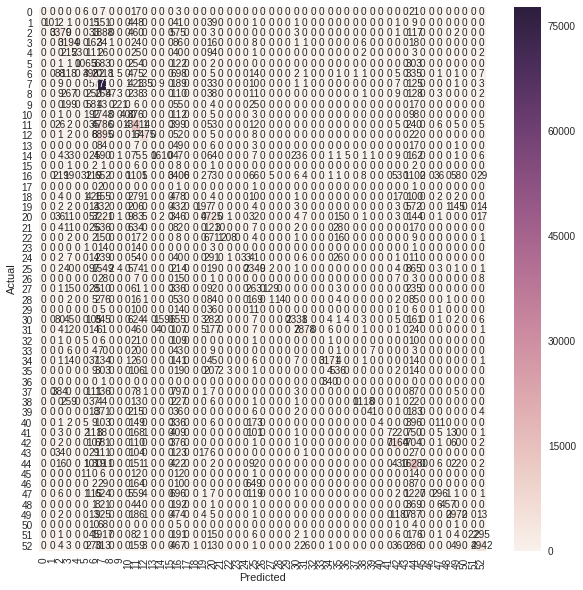

In [34]:
cm_NB = confusion_matrix(y_test,y_predict_NB)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_NB, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
accuracy_score(y_test, y_predict_NB, normalize=True, sample_weight=None)

0.667577336069389

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_NB))

                                 precision    recall  f1-score   support

        environemnt_dead_animal       0.00      0.00      0.00        54
     environment_abandoned_site       1.00      0.12      0.22       810
  environment_abandoned_vehicle       0.78      0.52      0.63      6461
      environment_air_pollution       0.71      0.90      0.80      3551
          environment_asbestos        1.00      0.04      0.08       542
        environment_dead_animal       0.94      0.44      0.60      2434
            environment_dumping       0.48      0.51      0.50      7765
 environment_garbage_collection       0.67      0.99      0.80     78722
            environment_general       0.92      0.03      0.07      1387
 environment_hazardous_material       0.94      0.19      0.32      1151
             environment_litter       0.99      0.12      0.21      3336
         environment_overgrowth       0.56      0.71      0.63     18993
          environment_recycling       0.97      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#SVC

modelsvc = LinearSVC()
modelsvc.fit(x_train, y_train)
y_predict_svc = modelsvc.predict(x_test)
cm_svc = confusion_matrix(y_test, y_predict_svc)

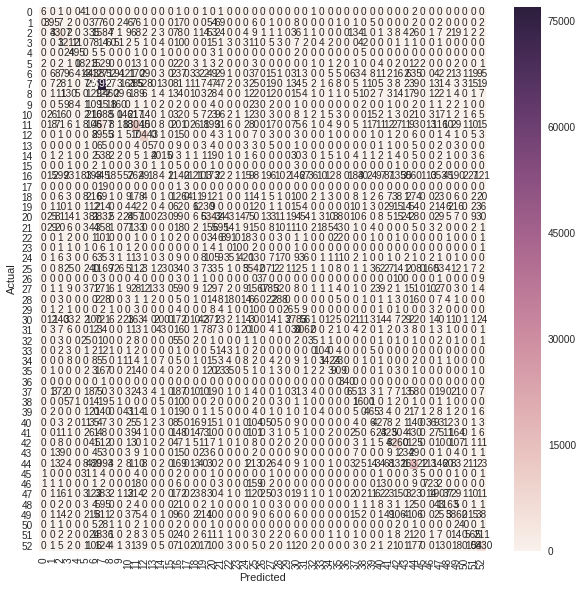

0.7642256679254141

In [37]:
#with SUB classes
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
display(accuracy_score(y_test, y_predict_svc, normalize=True, sample_weight=None))

In [25]:
print(classification_report(y_test, y_predict_NB))

                                 precision    recall  f1-score   support

        environemnt_dead_animal       0.00      0.00      0.00        54
     environment_abandoned_site       1.00      0.12      0.22       810
  environment_abandoned_vehicle       0.78      0.52      0.63      6461
      environment_air_pollution       0.71      0.90      0.80      3551
          environment_asbestos        1.00      0.04      0.08       542
        environment_dead_animal       0.94      0.44      0.60      2434
            environment_dumping       0.48      0.51      0.50      7765
 environment_garbage_collection       0.67      0.99      0.80     78722
            environment_general       0.92      0.03      0.07      1387
 environment_hazardous_material       0.94      0.19      0.32      1151
             environment_litter       0.99      0.12      0.21      3336
         environment_overgrowth       0.56      0.71      0.63     18993
          environment_recycling       0.97      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


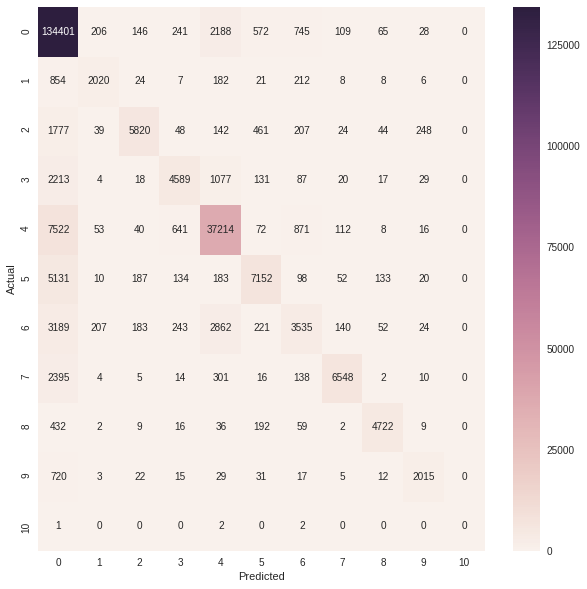

{'1': 'environment',
 '10': 'fire',
 '11': 'public_transit',
 '2': 'public_order',
 '3': 'planning',
 '4': 'infrastructure',
 '5': 'street',
 '6': 'housing',
 '7': 'governance',
 '8': 'vandalism',
 '9': 'public_health',
 'environment': 1,
 'fire': 10,
 'governance': 7,
 'housing': 6,
 'infrastructure': 4,
 'planning': 3,
 'public_health': 9,
 'public_order': 2,
 'public_transit': 11,
 'street': 5,
 'vandalism': 8}

0.8417304322843535

In [39]:
#with MAIN classes
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
display(accuracy_score(y_test, y_predict_svc, normalize=True, sample_weight=None))

In [40]:
accuracy_score(y_test, y_predict_svc, normalize=True, sample_weight=None)

0.8417304322843535

## gcForest

In [71]:
!git clone https://github.com/pylablanche/gcForest.git

Cloning into 'gcForest'...
remote: Enumerating objects: 271, done.
remote: Total 271 (delta 0), reused 0 (delta 0), pack-reused 271
Receiving objects: 100% (271/271), 66.48 KiB | 572.00 KiB/s, done.
Resolving deltas: 100% (127/127), done.


In [74]:
!ls gcForest

GCForest.py  gcForest_tuto.ipynb  LICENSE  README.md  requirements.txt


In [0]:
from gcForest.GCForest import *


Figure out how to use this implementation

In [1]:
gcf = gcForest(shape_1X=1, window=1, tolerance=0.0)
gcf.fit(x_train, y_train)
y_predict=gcf.predict(x_test)

NameError: ignored

New attempt

In [0]:
import argparse
import joblib
import keras
import psutil
import scipy
# simplejson
import tensorflow
import xgboost

In [42]:
!pip install simplejson

    100% |████████████████████████████████| 81kB 4.0MB/s 
  Running setup.py bdist_wheel for simplejson ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built simplejson


In [45]:
!git clone https://github.com/kingfengji/gcForest.git

Cloning into 'gcForest'...
remote: Enumerating objects: 254, done.
remote: Total 254 (delta 0), reused 0 (delta 0), pack-reused 254
Receiving objects: 100% (254/254), 111.43 KiB | 905.00 KiB/s, done.
Resolving deltas: 100% (92/92), done.


In [0]:
from gcForest.lib.gcforest.gcforest import GCForest

In [0]:
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = 0
    ca_config["max_layers"] = 100
    ca_config["early_stopping_rounds"] = 3
    ca_config["n_classes"] = 10
    ca_config["estimators"] = []
    ca_config["estimators"].append(
            {"n_folds": 5, "type": "XGBClassifier", "n_estimators": 10, "max_depth": 5,
             "objective": "multi:softprob", "silent": True, "nthread": -1, "learning_rate": 0.1} )
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "n_estimators": 10, "max_depth": None, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 5, "type": "ExtraTreesClassifier", "n_estimators": 10, "max_depth": None, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 5, "type": "LogisticRegression"})
    config["cascade"] = ca_config
    return config

config=get_toy_config()

from gcforest.gcforest import GCForest

gc = GCForest(config) # should be a dict

X_train_enc = gc.fit_transform(X_train, y_train)

y_pred = gc.predict(X_test)

In [59]:
!ls gcForest/lib/gcforest

cascade    data_cache.py  estimators	fgnet.py     __init__.py  __pycache__
config.py  datasets	  exp_utils.py	gcforest.py  layers	  utils


In [0]:
gc = GCForest(config)

In [66]:
x_train_enc = gc.fit_transform(x_train, y_train)

y_pred = gc.predict(x_test)

[ 2018-10-19 16:56:59,059][cascade_classifier.fit_transform] X_groups_train.shape=[(988283, 139661)],y_train.shape=(988283,),X_groups_test.shape=no_test,y_test.shape=no_test


NotImplementedError: ignored